## Introduction to the Research Environment

The research environment is powered by IPython notebooks, which allow one to perform a great deal of data analysis and statistical validation. We'll demonstrate a few simple techniques here.

## Code Cells vs. Text Cells

As you can see, each cell can be either code or text. To select between them, choose from the 'Cell Type' dropdown menu on the top left.

## Executing a Command

A code cell will be evaluated when you press play, or when you press the shortcut, shift-enter. Evaluating a cell evaluates each line of code in sequence, and prints the results of the last line below the cell.

My own example:

In [ ]:
import math
math.sin(2*math.pi)

-2.4492935982947064e-16

Sometimes there is no result to be printed, as is the case with assignment.

My own example:

In [ ]:
my_variable = 10

Remember that only the result from the last line is printed.

My own example:

In [ ]:
102 + 28
43 + 26

69

However, you can print whichever lines you want using the `print` statement.

My own example:

In [ ]:
print(2**2)
math.tan(0)

4


0.0

## Knowing When a Cell is Running

While a cell is running, a `[*]` will display on the left. When a cell has yet to be executed, `[ ]` will display. When it has been run, a number will display indicating the order in which it was run during the execution of the notebook `[5]`. Try on this cell and note it happening.

My own example:

In [ ]:
#Take some time to run something (around 12.5s in my laptop)
c = 0
for i in range(100000000):
    c = c + i
c

4999999950000000

## Importing Libraries

The vast majority of the time, you'll want to use functions from pre-built libraries. You can't import every library on Quantopian due to security issues, but you can import most of the common scientific ones. Here I import numpy and pandas, the two most common and useful libraries in quant finance. I recommend copying this import statement to every new notebook.

Notice that you can rename libraries to whatever you want after importing. The `as` statement allows this. Here we use `np` and `pd` as aliases for `numpy` and `pandas`. This is a very common aliasing and will be found in most code snippets around the web. The point behind this is to allow you to type fewer characters when you are frequently accessing these libraries.

My own example:

In [ ]:
import numpy as np
import pandas as pd

# This is a plotting library for pretty pictures.
import matplotlib.pyplot as plt

import turtle
import math

## Tab Autocomplete

Pressing tab will give you a list of IPython's best guesses for what you might want to type next. This is incredibly valuable and will save you a lot of time. If there is only one possible option for what you could type next, IPython will fill that in for you. Try pressing tab very frequently, it will seldom fill in anything you don't want, as if there is ambiguity a list will be shown. This is a great way to see what functions are available in a library.

Try placing your cursor after the `.` and pressing tab.

My own example:

In [ ]:
#Seems like this does not work using vscode... or somethimes it does
np.random.BitGenerator

numpy.random.bit_generator.BitGenerator

## Getting Documentation Help

Placing a question mark after a function and executing that line of code will give you the documentation IPython has for that function. It's often best to do this in a new cell, as you avoid re-executing other code and running into bugs.

My own example:

In [ ]:
np.random.normal?

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the ``normal`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution. Must be
    non-negative.
size : int or tuple of ints, optional
    Out

## Sampling

We'll sample some random data using a function from `numpy`.

My own example:

In [ ]:
# Sample 100 points with a mean of 0 and an std of 1. This is a standard normal distribution.
X = np.random.normal(0, 1, 100)

## Plotting

We can use the plotting library we imported as follows.

My own example:

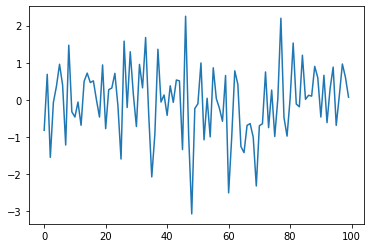

In [ ]:
plt.plot(X)

### Squelching Line Output

You might have noticed the annoying line of the form `[<matplotlib.lines.Line2D at 0x7f72fdbc1710>]` before the plots. This is because the `.plot` function actually produces output. Sometimes we wish not to display output, we can accomplish this with the semi-colon as follows.

My own example:

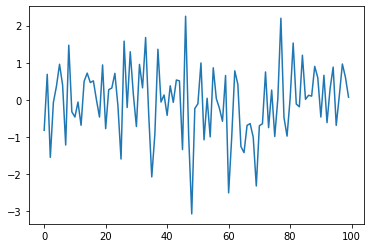

In [ ]:
#Doesn't seem pythonic
plt.plot(X);

### Adding Axis Labels

No self-respecting quant leaves a graph without labeled axes. Here are some commands to help with that.

My own example:

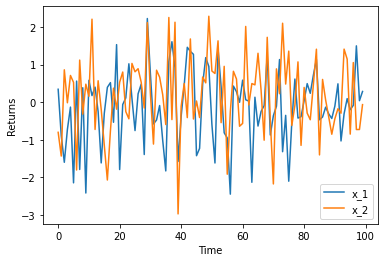

In [ ]:
X = np.random.normal(0, 1, 100)
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['x_1', 'x_2']);

## Generating Statistics

Let's use `numpy` to take some simple statistics.

My own example:

In [ ]:
np.mean(X)

-0.12653703293732033

In [ ]:
np.std(X)

0.9774725706666725

## Getting Real Pricing Data

Randomly sampled data can be great for testing ideas, but let's get some real data. We can use `get_pricing` to do that. You can use the `?` syntax as discussed above to get more information on `get_pricing`'s arguments.

My own example:

In [ ]:
#Unable to get function; quantopian is not in pip anymore
#They have around 90 repos and most so it's not effective search one by one.
# Most of the Google links are down. :C 
data = get_pricing('MSFT', start_date='2012-1-1', end_date='2015-6-1')

Our data is now a dataframe. You can see the datetime index and the colums with different pricing data.

My own example:

In [ ]:
#Unable to run this cell as I couldn't get the last function
data

This is a pandas dataframe, so we can index in to just get price like this. For more info on pandas, please [click here](http://pandas.pydata.org/pandas-docs/stable/10min.html).

My own example:

In [ ]:

#Unable to run this cell as I couldn't get the last function
X = data['price']

Because there is now also date information in our data, we provide two series to `.plot`. `X.index` gives us the datetime index, and `X.values` gives us the pricing values. These are used as the X and Y coordinates to make a graph.

My own example:

In [ ]:

#Unable to run this cell as I couldn't get the last function
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);

We can get statistics again on real data.

My own example:

In [ ]:

#Unable to run this cell as I couldn't get the last function
np.mean(X)

In [ ]:

#Unable to run this cell as I couldn't get the last function
np.std(X)

## Getting Returns from Prices

We can use the `pct_change` function to get returns. Notice how we drop the first element after doing this, as it will be `NaN` (nothing -> something results in a NaN percent change).

My own example:

In [ ]:

#Unable to run this cell as I couldn't get the last function
R = X.pct_change()[1:]

We can plot the returns distribution as a histogram.

My own example:

In [ ]:

#Unable to run this cell as I couldn't get the last function
plt.hist(R, bins=20)

plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

Get statistics again.

My own example:

In [ ]:

#Unable to run this cell as I couldn't get the last function
np.mean(R)

In [ ]:

#Unable to run this cell as I couldn't get the last function
np.std(R)

Now let's go backwards and generate data out of a normal distribution using the statistics we estimated from Microsoft's returns. We'll see that we have good reason to suspect Microsoft's returns may not be normal, as the resulting normal distribution looks far different.

My own example:

In [ ]:

#Unable to run this cell as I couldn't get the last function
plt.hist(np.random.normal(np.mean(R), np.std(R), 10000), bins=20)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns']);

## Generating a Moving Average

`pandas` has some nice tools to allow us to generate rolling statistics. Here's an example. Notice how there's no moving average for the first 60 days, as we don't have 60 days of data on which to generate the statistic.

My own example:

In [ ]:

#Unable to run this cell as I couldn't get the last function
# Take the average of the last 60 days at each timepoint.
MAVG = pd.rolling_mean(X, window=60)
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG']);

This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.

# Introduction to Python
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)


---

All of the coding that you will do on the Quantopian platform will be in Python. It is also just a good, jack-of-all-trades language to know! Here we will provide you with the basics so that you can feel confident going through our other lectures and understanding what is happening.

## Code Comments

A comment is a note made by a programmer in the source code of a program. Its purpose is to clarify the source code and make it easier for people to follow along with what is happening. Anything in a comment is generally ignored when the code is actually run, making comments useful for including explanations and reasoning as well as removing specific lines of code that you may be unsure about. Comments in Python are created by using the pound symbol (`# Insert Text Here`). Including a `#` in a line of code will comment out anything that follows it.

My own example:

In [ ]:
# This is a comment
# These lines of code will not change any values for they are just for humans
# Anything following the first # is not run as code

You may hear text enclosed in triple quotes (`""" Insert Text Here """`) referred to as multi-line comments, but this is not entirely accurate. This is a special type of `string` (a data type we will cover), called a `docstring`, used to explain the purpose of a function.

My own example:

In [ ]:
""" This is a special string """
""" For documentation porpuse """

Make sure you read the comments within each code cell (if they are there). They will provide more real-time explanations of what is going on as you look at each line of code.

## Variables

Variables provide names for values in programming. If you want to save a value for later or repeated use, you give the value a name, storing the contents in a variable. Variables in programming work in a fundamentally similar way to variables in algebra, but in Python they can take on various different data types.

The basic variable types that we will cover in this section are `integers`, `floating point numbers`, `booleans`, and `strings`. 

An `integer` in programming is the same as in mathematics, a round number with no values after the decimal point. We use the built-in `print` function here to display the values of our variables as well as their types!

My own example:

In [ ]:
my_own_integer = 420
print(my_own_integer)
type(my_own_integer)

420


int

Variables, regardless of type, are assigned by using a single equals sign (`=`). Variables are case-sensitive so any changes in variation in the capitals of a variable name will reference a different variable entirely.

My own example:

In [ ]:
one = 1
print(One)
#Doesn't work for One isn't defined

NameError: name 'One' is not defined

A `floating point` number, or a `float` is a fancy name for a real number (again as in mathematics). To define a `float`, we need to either include a decimal point or specify that the value is a float.

My own example:

In [ ]:
my_own_float = 3.14
print(my_own_float)
print(type(my_own_float))
my_own_float = float(1)
print(my_own_float)
print(type(my_own_float))

3.14
<class 'float'>
1.0
<class 'float'>


A variable of type `float` will not round the number that you store in it, while a variable of type `integer` will. This makes `floats` more suitable for mathematical calculations where you want more than just integers.

Note that as we used the `float()` function to force an number to be considered a `float`, we can use the `int()` function to force a number to be considered an `int`.

My own example:

In [ ]:
#Although it is not exactly a real number for a computer can compute infinite decimals
my_int = int(3.14159)
print(my_int)
type(my_int)

3


int


The `int()` function will also truncate any digits that a number may have after the decimal point!


Strings allow you to include text as a variable to operate on. They are defined using either single quotes ('') or double quotes ("").

My own example:

In [ ]:
#Python it's cool with either single or double quotes
my_string = 'This is a string with single quotes'
print(my_string)
my_string = "This is a string with double quotes"
print(my_string)

This is a string with single quotes
This is a string with double quotes


Both are allowed so that we can include apostrophes or quotation marks in a string if we so choose.

My own example:

In [ ]:
#We may get the same result using the scape operator
my_string = '"Jabberwocky", by Lewis Carroll'
print(my_string)
my_string = "'Twas brillig, and the slithy toves / Did gyre and gimble in the wabe;"
print(my_string)

"Jabberwocky", by Lewis Carroll
'Twas brillig, and the slithy toves / Did gyre and gimble in the wabe;


Booleans, or `bools` are binary variable types. A `bool` can only take on one of two values, these being `True` or `False`. There is much more to this idea of truth values when it comes to programming, which we cover later in the [Logical Operators](#id-section5) of this notebook.

My own example:

In [ ]:
my_bool = False
print(my_bool)
type(my_bool)

False


bool

There are many more data types that you can assign as variables in Python, but these are the basic ones! We will cover a few more later as we move through this tutorial.

## Basic Math

Python has a number of built-in math functions. These can be extended even further by importing the **math** package or by including any number of other calculation-based packages.

All of the basic arithmetic operations are supported: `+`, `-`, `/`, and `*`. You can create exponents by using `**` and modular arithmetic is introduced with the mod operator, `%`.

My own example:

In [ ]:
print('Addition: ', 20 + 14)
print('Subtraction: ', 14 - 1)
print('Multiplication: ', 10 * 10)
print('Division: ', 51 / 3)
print('Exponentiation: ', 10**2)

Addition:  34
Subtraction:  13
Multiplication:  100
Division:  17.0
Exponentiation:  100


If you are not familiar with the the mod operator, it operates like a remainder function. If we type $15 \ \% \ 4$, it will return the remainder after dividing $15$ by $4$.

My own example:

In [ ]:
#This is important for mudlar arithmetic
print('Modulo: ', 21 % 4)

Modulo:  1


Mathematical functions also work on variables!

My own example:

In [ ]:
first_integer = 23
second_integer = 1000
print(first_integer ** second_integer)

5343625548453879844292857176320782644042888867012926646743485228038157139627193683882356665906054036772481561637572059031516634712522952623234285540659664151196228595953117656958626530819316107276432204932359808210670163685960729338718985584473112609241724528921549947183838948375609020792154347404065860672139482363198469714546309125326641743037437110650267666113288844482416988346730577274101769204632724810711106145209813859796227148715581469786741866089224018451761152631545243609897627529643871938697982004753943494883307388645559480271015952466127840738658552117791637997768975514883161480553245991200370917292643557375026504381345976319783636401836485420258498144829946591399825205326154704312278953430474874313980636710681370212027412839779186974215628273072877570950881432759977344554432527898566250793523132563670280495523906786547605063445121964965287092777972774939317553630587367093534600708714452417443763366085304267876241366256885261191331594509900634339742875829083052442007748301162

Make sure that your variables are floats if you want to have decimal points in your answer. If you perform math exclusively with integers, you get an integer. Including any float in the calculation will make the result a float.

My own example:

In [ ]:
first_integer = 1
second_integer = 3
print(first_integer / second_integer)

0.3333333333333333


In [ ]:
first_number = 1.0
second_number = 3.0
print(first_number / second_number)

0.3333333333333333


Python has a few built-in math functions. The most notable of these are:

* `abs()`
* `round()`
* `max()`
* `min()`
* `sum()`

These functions all act as you would expect, given their names. Calling `abs()` on a number will return its absolute value. The `round()` function will round a number to a specified number of the decimal points (the default is $0$). Calling `max()` or `min()` on a collection of numbers will return, respectively, the maximum or minimum value in the collection. Calling `sum()` on a collection of numbers will add them all up. If you're not familiar with how collections of values in Python work, don't worry! We will cover collections in-depth in the next section. 

Additional math functionality can be added in with the `math` package.

In [ ]:
import math

The math library adds a long list of new mathematical functions to Python. Feel free to check out the [documentation](https://docs.python.org/2/library/math.html) for the full list and details. It concludes some mathematical constants

My own example:

In [ ]:
print('Pi: ', math.pi)
print("Euler's Constant: ", math.e)

Pi:  3.141592653589793
Euler's Constant:  2.718281828459045


As well as some commonly used math functions

My own example:

In [ ]:
print('Cosine of pi: ', math.cos(math.pi))

Cosine of pi:  -1.0


## Collections
### Lists

A `list` in Python is an ordered collection of objects that can contain any data type. We define a `list` using brackets (`[]`).

My own example:

In [ ]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print(my_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


We can access and index the list by using brackets as well. In order to select an individual element, simply type the list name followed by the index of the item you are looking for in braces.

My own example:

In [ ]:
#We start indexing from 0
print(my_list[5])
print(my_list[6])

6
7


Indexing in Python starts from $0$. If you have a list of length $n$, the first element of the list is at index $0$, the second element is at index $1$, and so on and so forth. The final element of the list will be at index $n-1$. Be careful! Trying to access a non-existent index will cause an error.

My own example:

In [ ]:
print('The first, second, and third list elements: ', my_list[0], my_list[1], my_list[2])
print('Accessing outside the list bounds causes an error: ', my_list[9])

The first, second, and third list elements:  1 2 3


IndexError: list index out of range

We can see the number of elements in a list by calling the `len()` function.

My own example:

In [ ]:
print(len(my_list))

9


We can update and change a list by accessing an index and assigning new value.

My own example:

In [ ]:
print(my_list)
my_list[0] = 34
my_list[8] = 420
print(my_list)

[34, 2, 3, 4, 5, 6, 7, 8, 9]
[34, 2, 3, 4, 5, 6, 7, 8, 420]


This is fundamentally different from how strings are handled. A `list` is mutable, meaning that you can change a `list`'s elements without changing the list itself. Some data types, like `strings`, are immutable, meaning you cannot change them at all. Once a `string` or other immutable data type has been created, it cannot be directly modified without creating an entirely new object.

My own example:

In [ ]:
my_string = "Strings never change"
my_string[0] = 'Z'

TypeError: 'str' object does not support item assignment

As we stated before, a list can contain any data type. Thus, lists can also contain strings.

My own example:

In [ ]:
my_list_2 = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
print(my_list_2)

['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']


Lists can also contain multiple different data types at once!

My own example:

In [ ]:
#Although possible, seems ugly
my_list_3 = [True, 'False', 42]

If you want to put two lists together, they can be combined with a `+` symbol.

My own example:

In [ ]:
#The sum sign is treated as concatenation or  "append"
my_list_4 = my_list + my_list_2 + my_list_3
print(my_list_4)

[34, 2, 3, 4, 5, 6, 7, 8, 420, 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', True, 'False', 42]


In addition to accessing individual elements of a list, we can access groups of elements through slicing.

In [ ]:
my_list = ['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']

#### Slicing

We use the colon (`:`) to slice lists. 

My own example:

In [ ]:
print(my_list[3:6])

['lend', 'me', 'your']


Using `:` we can select a group of elements in the list starting from the first element indicated and going up to  (but not including) the last element indicated.

We can also select everything after a certain point

My own example:

In [ ]:
print(my_list[4:])

['me', 'your', 'ears']


And everything before a certain point

My own example:

In [ ]:
print(my_list[:3])

['friends', 'romans', 'countrymen']


Using negative numbers will count from the end of the indices instead of from the beginning. For example, an index of `-1` indicates the last element of the list.

My own example:

In [ ]:
print(my_list[-2])

your


You can also add a third component to slicing. Instead of simply indicating the first and final parts of your slice, you can specify the step size that you want to take. So instead of taking every single element, you can take every other element.

My own example:

In [ ]:
print(my_list[1:4:2])

['romans', 'lend']


Here we have selected the entire list (because `0:7` will yield elements `0` through `6`) and we have selected a step size of `2`. So this will spit out element `0` , element `2`, element `4`, and so on through the list element selected. We can skip indicated the beginning and end of our slice, only indicating the step, if we like.

My own example:

In [ ]:
print(my_list[::2])

['friends', 'countrymen', 'me', 'ears']


Lists implictly select the beginning and end of the list when not otherwise specified.

My own example:

In [ ]:
#Same as print the whole list
print(my_list[:])

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears']


With a negative step size we can even reverse the list!

My own example:

In [ ]:
print(my_list[::-1])

['ears', 'your', 'me', 'lend', 'countrymen', 'romans', 'friends']


Python does not have native matrices, but with lists we can produce a working fascimile. Other packages, such as `numpy`, add matrices as a separate data type, but in base Python the best way to create a matrix is to use a list of lists.

We can also use built-in functions to generate lists. In particular we will look at `range()` (because we will be using it later!). Range can take several different inputs and will return a list.

My own example:

In [ ]:
b = 100
my_list = range(b)
print(my_list)

range(0, 100)


Similar to our list-slicing methods from before, we can define both a start and an end for our range. This will return a list that is includes the start and excludes the end, just like a slice.

My own example:

In [ ]:
a = 9
b = 100
my_list = range(a, b)
print(my_list)

range(9, 100)


We can also specify a step size. This again has the same behavior as a slice.

My own example:

In [ ]:
a = 0
b = 10000
step = 10
my_list = range(a, b, step)
print(my_list)

range(0, 10000, 10)


### Tuples

A `tuple` is a data type similar to a list in that it can hold different kinds of data types. The key difference here is that a `tuple` is immutable. We define a `tuple` by separating the elements we want to include by commas. It is conventional to surround a `tuple` with parentheses.

My own example:

In [ ]:
#Seems like parenthesis are not necessary
my_tuple = 'I', 'have', 30, 'cats'
print(my_tuple)

('I', 'have', 30, 'cats')


In [ ]:
my_tuple = ('I', 'have', 30, 'cats')
print(my_tuple)

('I', 'have', 30, 'cats')


As mentioned before, tuples are immutable. You can't change any part of them without defining a new tuple.

My own example:

In [ ]:
my_tuple[3] = 'dogs' # Attempts to change the 'cats' value stored in the the tuple to 'dogs'

TypeError: 'tuple' object does not support item assignment

You can slice tuples the same way that you slice lists!

My own example:

In [ ]:
print(my_tuple[1:3])

('have', 30)


And concatenate them the way that you would with strings!

My own example:

In [ ]:
my_other_tuple = ('make', 'that', 50)
print(my_tuple + my_other_tuple)

('I', 'have', 30, 'cats', 'make', 'that', 50)


We can 'pack' values together, creating a tuple (as above), or we can 'unpack' values from a tuple, taking them out.

My own example:

In [ ]:
str_1, str_2, int_1 = my_other_tuple
print(str_1, str_2, int_1)

make that 50


Unpacking assigns each value of the tuple in order to each variable on the left hand side of the equals sign. Some functions, including user-defined functions, may return tuples, so we can use this to directly unpack them and access the values that we want.

### Sets

A `set` is a collection of unordered, unique elements. It works almost exactly as you would expect a normal set of things in mathematics to work and is defined using braces (`{}`).

My own example:

In [ ]:
things_i_like = {'dogs', 7, 'the number 4', 4, 4, 4, 42, 'lizards', 'man I just LOVE the number 4'}
print(things_i_like, type(things_i_like))

{'man I just LOVE the number 4', 4, 7, 'the number 4', 'lizards', 42, 'dogs'} <class 'set'>


Note how any extra instances of the same item are removed in the final set. We can also create a `set` from a list, using the `set()` function.

My own example:

In [ ]:
animal_list = ['cats', 'dogs', 'dogs', 'dogs', 'lizards', 'sponges', 'cows', 'bats', 'sponges']
animal_set = set(animal_list)
print(animal_set) # Removes all extra instances from the list)

{'sponges', 'lizards', 'bats', 'dogs', 'cows', 'cats'}


Calling `len()` on a set will tell you how many elements are in it.

My own example:

In [ ]:
print(len(animal_set))

6


Because a `set` is unordered, we can't access individual elements using an index. We can, however, easily check for membership (to see if something is contained in a set) and take the unions and intersections of sets by using the built-in set functions.

My own example:

In [ ]:
'cats' in animal_set # Here we check for membership using the `in` keyword.

True

Here we checked to see whether the string 'cats' was contained within our `animal_set` and it returned `True`, telling us that it is indeed in our set.

We can connect sets by using typical mathematical set operators, namely `|`, for union, and `&`, for intersection. Using `|` or `&` will return exactly what you would expect if you are familiar with sets in mathematics.

My own example:

In [ ]:
print(animal_set | things_i_like) # You can also write things_i_like | animal_set with no difference

{'sponges', 4, 7, 'lizards', 'bats', 42, 'dogs', 'man I just LOVE the number 4', 'cows', 'the number 4', 'cats'}


Pairing two sets together with `|` combines the sets, removing any repetitions to make every set element unique.

My own example:

In [ ]:
print(animal_set & things_i_like) # You can also write things_i_like & animal_set with no difference

{'lizards', 'dogs'}


Pairing two sets together with `&` will calculate the intersection of both sets, returning a set that only contains what they have in common.

If you are interested in learning more about the built-in functions for sets, feel free to check out the [documentation](https://docs.python.org/2/library/sets.html).

### Dictionaries

Another essential data structure in Python is the dictionary. Dictionaries are defined with a combination of curly braces (`{}`) and colons (`:`). The braces define the beginning and end of a dictionary and the colons indicate key-value pairs. A dictionary is essentially a set of key-value pairs. The key of any entry must be an immutable data type. This makes both strings and tuples candidates. Keys can be both added and deleted.

In the following example, we have a dictionary composed of key-value pairs where the key is a genre of fiction (`string`) and the value is a list of books (`list`) within that genre. Since a collection is still considered a single entity, we can use one to collect multiple variables or values into one key-value pair.

My own example:

In [ ]:
my_dict = {"High Fantasy": ["Wheel of Time", "Lord of the Rings"], 
           "Sci-fi": ["Book of the New Sun", "Neuromancer", "Snow Crash"],
           "Weird Fiction": ["At the Mountains of Madness", "The House on the Borderland"]}

After defining a dictionary, we can access any individual value by indicating its key in brackets.

My own example:

In [ ]:
print(my_dict["Sci-fi"])

['Book of the New Sun', 'Neuromancer', 'Snow Crash']


We can also change the value associated with a given key

My own example:

In [ ]:
my_dict["Sci-fi"] = "I can't read" #I mean, I can
print(my_dict["Sci-fi"])

I can't read


Adding a new key-value pair is as simple as defining it.

My own example:

In [ ]:
my_dict["Historical Fiction"] = ["Pillars of the Earth"]
print(my_dict["Historical Fiction"])

['Pillars of the Earth']


In [ ]:
print(my_dict)

{'High Fantasy': ['Wheel of Time', 'Lord of the Rings'], 'Sci-fi': "I can't read", 'Weird Fiction': ['At the Mountains of Madness', 'The House on the Borderland'], 'Historical Fiction': ['Pillars of the Earth']}


## String Shenanigans

We already know that strings are generally used for text. We can used built-in operations to combine, split, and format strings easily, depending on our needs.

The `+` symbol indicates concatenation in string language. It will combine two strings into a longer string.

My own example:

In [57]:
first_string = '"Beware the Jabberwock, my son! /The jaws that bite, the claws that catch! /'
second_string = 'Beware the Jubjub bird, and shun /The frumious Bandersnatch!"/'
third_string = first_string + second_string
print(third_string)

"Beware the Jabberwock, my son! /The jaws that bite, the claws that catch! /Beware the Jubjub bird, and shun /The frumious Bandersnatch!"/


Strings are also indexed much in the same way that lists are.

My own example:

In [56]:
my_string = 'Supercalifragilisticexpialidocious'
print('The first letter is: ', my_string[0]) # Uppercase S)
print('The last letter is: ', my_string[-1]) # lowercase s)
print('The second to last letter is: ', my_string[-2]) # lowercase u)
print('The first five characters are: ', my_string[0:5]) # Remember: slicing doesn't include the final element!)
print('Reverse it!: ', my_string[::-1])

The first letter is:  S
The last letter is:  s
The second to last letter is:  u
The first five characters are:  Super
Reverse it!:  suoicodilaipxecitsiligarfilacrepuS


Built-in objects and classes often have special functions associated with them that are called methods. We access these methods by using a period ('.'). We will cover objects and their associated methods more in another lecture!

Using string methods we can count instances of a character or group of characters.

My own example:

In [58]:
print('Count of the letter i in Supercalifragilisticexpialidocious: ', my_string.count('i'))
print('Count of "li" in the same word: ', my_string.count('li'))

Count of the letter i in Supercalifragilisticexpialidocious:  7
Count of "li" in the same word:  3


We can also find the first instance of a character or group of characters in a string.

My own example:

In [59]:
print('the first time i appears is at index: ', my_string.find('i'))

the first time i appears is at index:  8


As well as replace characters in a string.

My own example:

In [60]:
print("All i's are now a's: ", my_string.replace('i', 'a'))

All i's are now a's:  Supercalafragalastacexpaaladocaous


In [61]:
print("It's raining cats and dogs".replace('dogs', 'more cats'))

It's raining cats and more cats


There are also some methods that are unique to strings. The function `upper()` will convert all characters in a string to uppercase, while `lower()` will convert all characters in a string to lowercase!

My own example:

In [62]:
my_string = "I can't hear you"
print(my_string.upper())
my_string = "I said HELLO"
print(my_string.lower())

I CAN'T HEAR YOU
i said hello


### String Formatting

Using the `format()` method we can add in variable values and generally format our strings.

My own example:

In [63]:
my_string = "{0} {1}".format('Marco', 'Polo')
print(my_string)

Marco Polo


In [64]:
my_string = "{1} {0}".format('Marco', 'Polo')
print(my_string)

Polo Marco


We use braces (`{}`) to indicate parts of the string that will be filled in later and we use the arguments of the `format()` function to provide the values to substitute. The numbers within the braces indicate the index of the value in the `format()` arguments.

See the `format()` [documentation](https://docs.python.org/2/library/string.html#format-examples) for additional examples.

If you need some quick and dirty formatting, you can instead use the `%` symbol, called the string formatting operator. 

My own example:

In [65]:
print('insert %s here' % 'value')

insert value here


The `%` symbol basically cues Python to create a placeholder. Whatever character follows the `%` (in the string) indicates what sort of type the value put into the placeholder will have. This character is called a *conversion type*. Once the string has been closed, we need another `%` that will be followed by the values to insert. In the case of one value, you can just put it there. If you are inserting more than one value, they must be enclosed in a tuple.

My own example:

In [66]:
print('There are %s cats in my %s' % (13, 'apartment'))

There are 13 cats in my apartment


In these examples, the `%s` indicates that Python should convert the values into strings. There are multiple conversion types that you can use to get more specific with the the formatting. See the string formatting [documentation](https://docs.python.org/2/library/stdtypes.html#string-formatting) for additional examples and more complete details on use.

## Logical Operators
### Basic Logic

Logical operators deal with `boolean` values, as we briefly covered before. If you recall, a `bool` takes on one of two values, `True` or `False` (or $1$ or $0$). The basic logical statements that we can make are defined using the built-in comparators. These are `==` (equal), `!=` (not equal), `<` (less than), `>` (greater than), `<=` (less than or equal to), and `>=` (greater than or equal to).

My own example:

In [67]:
print(6 == 5)

False


In [68]:
print(5 > 5)

False


These comparators also work in conjunction with variables.

My own example:

In [69]:
m = 2
n = 23
print(m < n)

True


We can string these comparators together to make more complex logical statements using the logical operators `or`, `and`, and `not`. 

My own example:

In [70]:
statement_1 = 10 > 2
statement_2 = 4 <= 6
print("Statement 1 truth value: {0}".format(statement_1))
print("Statement 2 truth value: {0}".format(statement_2))
print("Statement 1 and Statement 2: {0}".format(statement_1 and statement_2))

Statement 1 truth value: True
Statement 2 truth value: True
Statement 1 and Statement 2: True


The `or` operator performs a logical `or` calculation. This is an inclusive `or`, so if either component paired together by `or` is `True`, the whole statement will be `True`. The `and` statement only outputs `True` if all components that are `and`ed together are True. Otherwise it will output `False`. The `not` statement simply inverts the truth value of whichever statement follows it. So a `True` statement will be evaluated as `False` when a `not` is placed in front of it. Similarly, a `False` statement will become `True` when a `not` is in front of it.

Say that we have two logical statements, or assertions, $P$ and $Q$. The truth table for the basic logical operators is as follows:

|  P  |  Q  | `not` P| P `and` Q | P `or` Q|
|:-----:|:-----:|:---:|:---:|:---:|
| `True` | `True` | `False` | `True` | `True` |
| `False` | `True` | `True` | `False` | `True` |
| `True` | `False` | `False` | `False` | `True` |
| `False` | `False` | `True` | `False` | `False` |

We can string multiple logical statements together using the logical operators.

My own example:

In [71]:
print ((2 < 3) and (3 > 0)) or ((5 > 6) and not (4 < 2))

True


False

Logical statements can be as simple or complex as we like, depending on what we need to express. Evaluating the above logical statement step by step we see that we are evaluating (`True and True`) `or` (`False and not False`). This becomes `True or (False and True`), subsequently becoming `True or False`, ultimately being evaluated as `True`.

#### Truthiness

Data types in Python have a fun characteristic called truthiness. What this means is that most built-in types will evaluate as either `True` or `False` when a boolean value is needed (such as with an if-statement). As a general rule, containers like strings, tuples, dictionaries, lists, and sets, will return `True` if they contain anything at all and `False` if they contain nothing.

My own example:

In [72]:
# Similar to how float() and int() work, bool() forces a value to be considered a boolean!
print(bool(''))

False


In [73]:
print(bool('I have character!'))

True


In [74]:
print(bool([]))

False


In [75]:
print(bool([1, 2, 3]))

True


And so on, for the other collections and containers. `None` also evaluates as `False`. The number `1` is equivalent to `True` and the number `0` is equivalent to `False` as well, in a boolean context.

### If-statements

We can create segments of code that only execute if a set of conditions is met. We use if-statements in conjunction with logical statements in order to create branches in our code. 

An `if` block gets entered when the condition is considered to be `True`. If condition is evaluated as `False`, the `if` block will simply be skipped unless there is an `else` block to accompany it. Conditions are made using either logical operators or by using the truthiness of values in Python. An if-statement is defined with a colon and a block of indented text.

In [ ]:
# This is the basic format of an if statement. This is a vacuous example. 
# The string "Condition" will always evaluated as True because it is a
# non-empty string. he purpose of this code is to show the formatting of
# an if-statement.
if "Condition": 
    # This block of code will execute because the string is non-empty
    # Everything on these indented lines
    print True
else:
    # So if the condition that we examined with if is in fact False
    # This block of code will execute INSTEAD of the first block of code
    # Everything on these indented lines
    print False
# The else block here will never execute because "Condition" is a non-empty string.

My own example:

In [78]:
i = 5
if i == 5:
    print('The variable i has a value of 5')

The variable i has a value of 5


Because in this example `i = 4` and the if-statement is only looking for whether `i` is equal to `5`, the print statement will never be executed. We can add in an `else` statement to create a contingency block of code in case the condition in the if-statement is not evaluated as `True`.

My own example:

In [79]:
i = 4
if i == 5:
    print("All lines in this indented block are part of this block")
    print('The variable i has a value of 5')
else:
    print("All lines in this indented block are part of this block")
    print('The variable i is not equal to 5')

All lines in this indented block are part of this block
The variable i is not equal to 5


We can implement other branches off of the same if-statement by using `elif`, an abbreviation of "else if". We can include as many `elifs` as we like until we have exhausted all the logical branches of a condition.

My own example:

In [80]:
i = 1
if i == 1:
    print('The variable i has a value of 1')
elif i == 2:
    print('The variable i has a value of 2')
elif i == 3:
    print('The variable i has a value of 3')
else:
    print("I don't care what i is")

The variable i has a value of 1


You can also nest if-statements within if-statements to check for further conditions.

My own example:

In [81]:
i = 10
if i % 2 == 0:
    if i % 3 == 0:
        print('i is divisible by both 2 and 3! Wow!')
    elif i % 5 == 0:
        print('i is divisible by both 2 and 5! Wow!')
    else:
        print('i is divisible by 2, but not 3 or 5. Meh.')
else:
    print('I guess that i is an odd number. Boring.')

i is divisible by both 2 and 5! Wow!


Remember that we can group multiple conditions together by using the logical operators!

My own example:

In [82]:
i = 5
j = 12
if i < 10 and j > 11:
    print('{0} is less than 10 and {1} is greater than 11! How novel and interesting!'.format(i, j))

5 is less than 10 and 12 is greater than 11! How novel and interesting!


You can use the logical comparators to compare strings!

My own example:

In [83]:
my_string = "Carthago delenda est"
if my_string == "Carthago delenda est":
    print('And so it was! For the glory of Rome!')
else:
    print('War elephants are TERRIFYING. I am staying home.')

And so it was! For the glory of Rome!


As with other data types, `==` will check for whether the two things on either side of it have the same value. In this case, we compare whether the value of the strings are the same. Using `>` or `<` or any of the other comparators is not quite so intuitive, however, so we will stay from using comparators with strings in this lecture. Comparators will examine the [lexicographical order](https://en.wikipedia.org/wiki/Lexicographical_order) of the strings, which might be a bit more in-depth than you might like.

Some built-in functions return a boolean value, so they can be used as conditions in an if-statement. User-defined functions can also be constructed so that they return a boolean value. This will be covered later with function definition!

The `in` keyword is generally used to check membership of a value within another value. We can check memebership in the context of an if-statement and use it to output a truth value.

My own example:

In [84]:
if 'a' in my_string or 'e' in my_string:
    print('Those are my favorite vowels!')

Those are my favorite vowels!


Here we use `in` to check whether the variable `my_string` contains any particular letters. We will later use `in` to iterate through lists!

My own example:

## Loop Structures

Loop structures are one of the most important parts of programming. The `for` loop and the `while` loop provide a way to repeatedly run a block of code repeatedly. A `while` loop will iterate until a certain condition has been met. If at any point after an iteration that condition is no longer satisfied, the loop terminates. A `for` loop will iterate over a sequence of values and terminate when the sequence has ended. You can instead include conditions within the `for` loop to decide whether it should terminate early or you could simply let it run its course.

My own example:

In [85]:
i = 5
while i > 0: # We can write this as 'while i:' because 0 is False!
    i -= 1
    print('I am looping! {0} more to go!'.format(i))

I am looping! 4 more to go!
I am looping! 3 more to go!
I am looping! 2 more to go!
I am looping! 1 more to go!
I am looping! 0 more to go!



With `while` loops we need to make sure that something actually changes from iteration to iteration so that that the loop actually terminates. In this case, we use the shorthand `i -= 1` (short for `i = i - 1`) so that the value of `i` gets smaller with each iteration. Eventually `i` will be reduced to `0`, rendering the condition `False` and exiting the loop.

A `for` loop iterates a set number of times, determined when you state the entry into the loop. In this case we are iterating over the list returned from `range()`. The `for` loop selects a value from the list, in order, and temporarily assigns the value of `i` to it so that operations can be performed with the value.

My own example:

In [86]:
for i in range(5):
    print('I am looping! I have looped {0} times!'.format(i + 1))

I am looping! I have looped 1 times!
I am looping! I have looped 2 times!
I am looping! I have looped 3 times!
I am looping! I have looped 4 times!
I am looping! I have looped 5 times!


Note that in this `for` loop we use the `in` keyword. Use of the `in` keyword is not limited to checking for membership as in the if-statement example. You can iterate over any collection with a `for` loop by using the `in` keyword.

In this next example, we will iterate over a `set` because we want to check for containment and add to a new set.

My own example:

In [87]:
my_list = {'cats', 'dogs', 'lizards', 'cows', 'bats', 'sponges', 'humans'} # Lists all the animals in the world
mammal_list = {'cats', 'dogs', 'cows', 'bats', 'humans'} # Lists all the mammals in the world
my_new_list = set()
for animal in my_list:
    if animal in mammal_list:
        # This adds any animal that is both in my_list and mammal_list to my_new_list
        my_new_list.add(animal)
        
print(my_new_list)

{'bats', 'dogs', 'humans', 'cows', 'cats'}


There are two statements that are very helpful in dealing with both `for` and `while` loops. These are `break` and `continue`. If `break` is encountered at any point while a loop is executing, the loop will immediately end.

My own example:

In [88]:
i = 10
while True:
    if i == 14:
        break
    i += 1 # This is shorthand for i = i + 1. It increments i with each iteration.
    print(i)

11
12
13
14


In [89]:
for i in range(5):
    if i == 2:
        break
    print(i)

0
1


The `continue` statement will tell the loop to immediately end this iteration and continue onto the next iteration of the loop.

My own example:

In [90]:
i = 0
while i < 5:
    i += 1
    if i == 3:
        continue
    print(i)

1
2
4
5


This loop skips printing the number $3$ because of the `continue` statement that executes when we enter the if-statement. The code never sees the command to print the number $3$ because it has already moved to the next iteration. The `break` and `continue` statements are further tools to help you control the flow of your loops and, as a result, your code.

The variable that we use to iterate over a loop will retain its value when the loop exits. Similarly, any variables defined within the context of the loop will continue to exist outside of it.

My own example:

In [91]:
for i in range(5):
    loop_string = 'I transcend the loop!'
    print('I am eternal! I am {0} and I exist everywhere!'.format(i))

print('I persist! My value is {0}'.format(i))
print(loop_string)

I am eternal! I am 0 and I exist everywhere!
I am eternal! I am 1 and I exist everywhere!
I am eternal! I am 2 and I exist everywhere!
I am eternal! I am 3 and I exist everywhere!
I am eternal! I am 4 and I exist everywhere!
I persist! My value is 4
I transcend the loop!


We can also iterate over a dictionary!

My own example:

In [ ]:
my_dict = {'firstname' : 'Inigo', 'lastname' : 'Montoya', 'nemesis' : 'Rugen'}

In [ ]:
for key in my_dict:
    print(key)

High Fantasy
Sci-fi
Weird Fiction
Historical Fiction


If we just iterate over a dictionary without doing anything else, we will only get the keys. We can either use the keys to get the values, like so:

My own example:

In [ ]:
for key in my_dict:
    print(my_dict[key])

['Wheel of Time', 'Lord of the Rings']
I can't read
['At the Mountains of Madness', 'The House on the Borderland']
['Pillars of the Earth']


Or we can use the `items()` function to get both key and value at the same time.

My own example:

In [ ]:
for key, value in my_dict.items():
    print(key, ':', value)

High Fantasy : ['Wheel of Time', 'Lord of the Rings']
Sci-fi : I can't read
Weird Fiction : ['At the Mountains of Madness', 'The House on the Borderland']
Historical Fiction : ['Pillars of the Earth']


The `items()` function creates a tuple of each key-value pair and the for loop unpacks that tuple into `key, value` on each separate execution of the loop!

My own example:

## Functions

A function is a reusable block of code that you can call repeatedly to make calculations, output data, or really do anything that you want. This is one of the key aspects of using a programming language. To add to the built-in functions in Python, you can define your own!

My own example:

In [ ]:
def hello_world():
    """ Prints Hello, world! """
    print('Hello, world!')

hello_world()

Hello, world!


In [ ]:
for i in range(5):
    hello_world()

Hello, world!
Hello, world!
Hello, world!
Hello, world!
Hello, world!


Functions are defined with `def`, a function name, a list of parameters, and a colon. Everything indented below the colon will be included in the definition of the function.

We can have our functions do anything that you can do with a normal block of code. For example, our `hello_world()` function prints a string every time it is called. If we want to keep a value that a function calculates, we can define the function so that it will `return` the value we want. This is a very important feature of functions, as any variable defined purely within a function will not exist outside of it.

My own example:

In [ ]:
def see_the_scope():
    in_function_string = "I'm stuck in here!"

see_the_scope()
print(in_function_string)

NameError: name 'in_function_string' is not defined

 The **scope** of a variable is the part of a block of code where that variable is tied to a particular value. Functions in Python have an enclosed scope, making it so that variables defined within them can only be accessed directly within them. If we pass those values to a return statement we can get them out of the function. This makes it so that the function call returns values so that you can store them in variables that have a greater scope.
 
In this case specifically, including a return statement allows us to keep the string value that we define in the function.

My own example:

In [ ]:
def free_the_scope():
    in_function_string = "Anything you can do I can do better!"
    return in_function_string
my_string = free_the_scope()
print(my_string)

Anything you can do I can do better!


Just as we can get values out of a function, we can also put values into a function. We do this by defining our function with parameters.

My own example:

In [ ]:
def multiply_by_five(x):
    """ Multiplies an input number by 5 """
    return x * 5

n = 4
print(n)
print(multiply_by_five(n))

4
20


In this example we only had one parameter for our function, `x`. We can easily add more parameters, separating everything with a comma.

My own example:

In [ ]:
def calculate_area(length, width):
    """ Calculates the area of a rectangle """
    return length * width

In [ ]:
l = 5
w = 10
print('Area: ', calculate_area(l, w))
print('Length: ', l)
print('Width: ', w)

Area:  50
Length:  5
Width:  10


In [ ]:
def calculate_volume(length, width, depth):
    """ Calculates the volume of a rectangular prism """
    return length * width * depth

If we want to, we can define a function so that it takes an arbitrary number of parameters. We tell Python that we want this by using an asterisk (`*`).

My own example:

In [ ]:
def sum_values(*args):
    sum_val = 0
    for i in args:
        sum_val += i
    return sum_val

In [ ]:
print(sum_values(1, 2, 3))
print(sum_values(10, 20, 30, 40, 50))
print(sum_values(4, 2, 5, 1, 10, 249, 25, 24, 13, 6, 4))

6
150
343


The time to use `*args` as a parameter for your function is when you do not know how many values may be passed to it, as in the case of our sum function. The asterisk in this case is the syntax that tells Python that you are going to pass an arbitrary number of parameters into your function. These parameters are stored in the form of a tuple.

My own example:

In [ ]:
def test_args(*args):
    print(type(args))

test_args(1, 2, 3, 4, 5, 6)

<class 'tuple'>


We can put as many elements into the `args` tuple as we want to when we call the function. However, because `args` is a tuple, we cannot modify it after it has been created.

The `args` name of the variable is purely by convention. You could just as easily name your parameter `*vars` or `*things`. You can treat the `args` tuple like you would any other tuple, easily accessing `arg`'s values and iterating over it, as in the above `sum_values(*args)` function.

Our functions can return any data type. This makes it easy for us to create functions that check for conditions that we might want to monitor.

Here we define a function that returns a boolean value. We can easily use this in conjunction with if-statements and  other situations that require a boolean.

My own example:

In [ ]:
def has_a_vowel(word):
    """ 
    Checks to see whether a word contains a vowel 
    If it doesn't contain a conventional vowel, it
    will check for the presence of 'y' or 'w'. Does
    not check to see whether those are in the word
    in a vowel context.
    """
    vowel_list = ['a', 'e', 'i', 'o', 'u']
    
    for vowel in vowel_list:
        if vowel in word:
            return True
    # If there is a vowel in the word, the function returns, preventing anything after this loop from running
    return False

In [ ]:
my_word = 'catnapping'
if has_a_vowel(my_word):
    print('How surprising, an english word contains a vowel.')
else:
    print('This is actually surprising.')

How surprising, an english word contains a vowel.


In [ ]:
def point_maker(x, y):
    """ Groups x and y values into a point, technically a tuple """
    return x, y

This above function returns an ordered pair of the input parameters, stored as a tuple.

My own example:

In [ ]:
a = point_maker(0, 10)
b = point_maker(5, 3)
def calculate_slope(point_a, point_b):
    """ Calculates the linear slope between two points """
    return (point_b[1] - point_a[1])/(point_b[0] - point_a[0])
print("The slope between a and b is {0}".format(calculate_slope(a, b)))

The slope between a and b is -1.4


And that one calculates the slope between two points!

My own example:

In [ ]:
print("The slope-intercept form of the line between a and b, using point a, is: y - {0} = {2}(x - {1})".format(a[1], a[0], calculate_slope(a, b)))

The slope-intercept form of the line between a and b, using point a, is: y - 10 = -1.4(x - 0)


With the proper syntax, you can define functions to do whatever calculations you want. This makes them an indispensible part of programming in any language.

## Next Steps

This was a lot of material and there is still even more to cover! Make sure you play around with the cells in each notebook to accustom yourself to the syntax featured here and to figure out any limitations. If you want to delve even deeper into the material, the [documentation for Python](https://docs.python.org/2/) is all available online. We are in the process of developing a second part to this Python tutorial, designed to provide you with even more programming knowledge, so keep an eye on the [Quantopian Lectures Page](quantopian.com/lectures) and the [forums](quantopian.com/posts) for any new lectures.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">

Quantconnect

Introduction to Financial Python
</div>

# 01 Data Types and Data Structures

# Introduction

This tutorial provides a basic introduction to the Python programming language. If you are new to Python, you should run the code snippets while reading this tutorial. If you are an advanced Python user, please feel free to skip this chapter.

# Basic Variable Types
The basic types of variables in Python are: strings, integers, floating point numbers and booleans.

Strings in python are identified as a contiguous set of characters represented in either single quotes (' ') or double quotes (" ").


My own example:

In [4]:
my_string1 = 'Welcome to'
my_string2 = "algorithm's class"
print(my_string1 + ' ' + my_string2)

Welcome to algorithm's class


An integer is a round number with no values after the decimal point.

My own example:

In [5]:
my_int = 3
print(my_int)
print(type(my_int))

3
<class 'int'>


The built-in function int() can convert a string into an integer.

My own example:

In [6]:
my_string = "87"
print(type(my_string))
my_int = int(my_string)
print(type(my_int))

<class 'str'>
<class 'int'>


A floating point number, or a float, is a real number in mathematics. In Python we need to include a value after a decimal point to define it as a float

My own example:

In [7]:
my_float = 3.0

print(type(my_float))
my_int = 1
print(type(my_int))

<class 'float'>
<class 'int'>


As you can see above, if we don't include a decimal value, the variable would be defined as an integer. The built-in function float() can convert a string or an integer into a float.

My own example:

In [8]:
my_bool = True 
print(my_bool)
print(type(my_bool))

True
<class 'bool'>


A boolean, or bool, is a binary variable. Its value can only be True or False. It is useful when we do some logic operations, which would be covered in our next chapter.

My own example:

In [9]:
print("Addition ", 6+4)
print("Subtraction ", 3-9)
print("Multiplication ", 9*9)
print("Division ", 14/7)
print('exponent', 4**4)

Addition  10
Subtraction  -6
Multiplication  81
Division  2.0
exponent 256


# Data Collections

##  List
A list is an ordered collection of values. A list is mutable, which means you can change a list's value without changing the list itself. Creating a list is simply putting different comma-separated values between square brackets.

My own example:

In [10]:
my_list = ['Algorithm\'s', 'class', 4,5,3]
print(my_list)

["Algorithm's", 'class', 4, 5, 3]


The values in a list are called "elements". We can access list elements by indexing. Python index starts from 0. So if you have a list of length n, the index of the first element will be 0, and that of the last element will be n − 1. By the way, the length of a list can be obtained by the built-in function len().

My own example:

In [11]:
my_list = ['Algorithm\'s', 'Class', 4,5,3]
print(len(my_list))
print(my_list[0])
print(my_list[len(my_list) -1])

5
Algorithm's
3


You can also change the elements in the list by accessing an index and assigning a new value.

My own example:

In [12]:
my_list = ['Algorithm\'s','Class',1,3,7]
my_list[2] = 'rocks'
print(my_list)

["Algorithm's", 'Class', 'rocks', 3, 7]


A list can also be sliced with a colon:

My own example:

In [13]:
my_list = ['Algorithm\'s','Class',1,3,7]
print(my_list[1:3])

['Class', 1]


The slice starts from the first element indicated, but excludes the last element indicated. Here we select all elements starting from index 1, which refers to the second element:

My own example:

In [14]:
print(my_list[1:])

['Class', 1, 3, 7]


And all elements up to but excluding index 3:

My own example:

In [15]:
print(my_list[:3])

["Algorithm's", 'Class', 1]


If you wish to add or remove an element from a list, you can use the append() and remove() methods for lists as follows:

My own example:

In [16]:
my_list = ['Algorithm\'s', 'Class']
my_list.append('Hello')
print(my_list)



["Algorithm's", 'Class', 'Hello']


My own example:

In [17]:
my_list.remove('Hello')
print(my_list)

["Algorithm's", 'Class']


When there are repeated instances of "Hello", the first one is removed.

##  Tuple
A tuple is a data structure type similar to a list. The difference is that a tuple is immutable, which means you can't change the elements in it once it's defined. We create a tuple by putting comma-separated values between parentheses.

My own example:

In [18]:
my_tuple = ('Welcome','to','Algorithm\'s', 'Class')

Just like a list, a tuple can be sliced by using index.

My own example:

In [19]:
my_tuple = ('Welcome','to','Algorithm\'s class')
print(my_tuple[1:])

('to', "Algorithm's class")


##  Set
A set is an **unordered**  collection with **no duplicate** elements. The built-in function **set()** can be used to create sets.

My own example:

In [20]:
stock_list = ['Apple','Google','IBM','Apple','IBM','Facebook','Feik','Google']
stock_set = set(stock_list)
print(stock_set)

{'Apple', 'Feik', 'Google', 'IBM', 'Facebook'}


Set is an easy way to remove duplicate elements from a list.

##  Dictionary
A dictionary is one of the most important data structures in Python. Unlike sequences which are indexed by integers, dictionaries are indexed by keys which can be either strings or floats.

A dictionary is an **unordered** collection of key : value pairs, with the requirement that the keys are unique. We create a dictionary by placing a comma-separated list of key : value pairs within the braces.

My own example:

In [21]:
my_dic = {'AAPL':'apple', 'FB':'facebook', 'GOOG':'google'}

After defining a dictionary, we can access any value by indicating its key in brackets.

My own example:

In [22]:

print(my_dic['GOOG'])

google


We can also change the value associated with a specified key:

My own example:

In [23]:

my_dic['GOOG'] = 'Algorithm\'s class'
print(my_dic['GOOG'])

Algorithm's class


The built-in method of the dictionary object dict.keys() returns a list of all the keys used in the dictionary.

In [24]:

print(my_dic.keys())

dict_keys(['AAPL', 'FB', 'GOOG'])


# Common String Operations
A string is an immutable sequence of characters. It can be sliced by index just like a tuple:

My own example:

In [25]:
my_str = 'Welcome to algorithm\'s class'
print(my_str[8:])

to algorithm's class


There are many methods associated with strings. We can use string.count() to count the occurrences of a character in a string, use string.find() to return the index of a specific character, and use string.replace() to replace characters

My own example:

In [26]:
print('Estoy contando el número de oes en esta oración'.count('o'))
print('El índice de la primera a en esta oración'.find('a'))
print('Todas las aes de esta oración se vuelven ues'.replace('a','u'))

6
14
Todus lus ues de estu orución se vuelven ues


The most commonly used method for strings is string.split(). This method will split the string by the indicated character and return a list:

My own example:

In [27]:
Time = '01-04-2022 16:14:43'
splited_list = Time.split(' ')
date = splited_list[0]
time = splited_list[1]
print(date, time)
hour = time.split(':')[0]
print(hour)

01-04-2022 16:14:43
16


We can replace parts of a string by our variable. This is called string formatting.

My own example:

In [28]:
my_time = 'Hour: {}, Minute:{}'.format('16','15')
print(my_time)

Hour: 16, Minute:15


Another way to format a string is to use the % symbol.

My own example:

In [29]:
print('the euler number is %f'%2.71)
print('%s to %s'%('Welcome','Algorithm\'s Class'))

the euler number is 2.710000
Welcome to Algorithm's Class


# Summary

Weave seen the basic data types and data structures in Python. It's important to keep practicing to become familiar with these data structures. In the next tutorial, we will cover for and while loops and logical operations in Python.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">

Quantconnect

Introduction to Financial Python
</div>

# 02 Logical Operations and Loops

# Introduction
We discussed the basic data types and data structures in Python in the last tutorial. This chapter covers logical operations and loops in Python, which are very common in programming.

# Logical Operations
Like most programming languages, Python has comparison operators:

My own example:

In [30]:
print(34 == 69)
print(7 == 7)
print(34 != 69)
print(99 >= 99)
print(0 >= 1)

False
True
True
True
False


Each statement above has a boolean value, which must be either True or False, but not both.

We can combine simple statements P and Q to form complex statements using logical operators:

- The statement "P and Q" is true if both P and Q are true, otherwise it is false.
- The statement "P or Q" is false if both P and Q are false, otherwise it is true.
- The statement "not P" is true if P is false, and vice versa.

My own example:

In [31]:
print(100 > 0 and 50 > 1)
print(50 > 3 and 1897 < 9) 
print(2022 > 1999 or 1984 < 2022)
print(1001 < 1 and 5000 < 5)

True
False
True
False


When dealing with a very complex logical statement that involves in several statements, we can use brackets to separate and combine them.

My own example:

In [32]:
print((5000 > 1984 or 9 < 5000) and (9!=5000 and 4>5000) and not ( 5000 < 1984 or 9 < 5000 and (9!=5000 and 4>5000)))
print(5000 > 1984 or 666 < 1984 and (666!=1984 and 9999>1984) and not ( 1984 < 1984 or 666 < 1984 and (666!=1984 and 9999>1984)))

False
True


Comparing the above two statements, we can see that it's wise to use brackets when we make a complex logical statement.

# If Statement
An if statement executes a segment of code only if its condition is true. A standard if statement consists of 3 segments: if, elif and else.

```python
if statement1:
    # if the statement1 is true, execute the code here.
    # code.....
    # code.....
elif statement2:
    # if the statement 1 is false, skip the codes above to this part.
    # code......
    # code......
else:
    # if none of the above statements is True, skip to this part
    # code......
```

An if statement doesn't necessarily has elif and else part. If it's not specified, the indented block of code will be executed when the condition is true, otherwise the whole if statement will be skipped.

My own example:

In [31]:
condition = 1
if condition == 1:
    print('condition==1 is True')

i==0 is True


As we mentioned above, we can write some complex statements here:

My own example:

In [34]:
p = 2022 > 2019
q = 1984 > 1951
if p and q:
    print('p and q is true')
elif p and not q:
    print('q is false')
elif q and not p:
    print('p is false')
else:
    print('None of p and q is true')

p and q is true


# Loop Structure
Loops are an essential part of programming. The "for" and "while" loops run a block of code repeatedly.

##  While Loop
A "while" loop will run repeatedly until a certain condition has been met.

My own example:

In [35]:
i = 10
while i < 20:
    print(i)
    i += 2 

10
12
14
16
18


When making a while loop, we need to ensure that something changes from iteration to iteration so that the while loop will terminate, otherwise, it will run forever. Here we used i += 1 (short for i = i + 1) to make i larger after each iteration. This is the most commonly used method to control a while loop.

##  For Loop
A "for" loop will iterate over a sequence of value and terminate when the sequence has ended.

My own example

In [39]:
for i in [x*x for x in range(1,11)]:
    print(i)

1
4
9
16
25
36
49
64
81
100


We can also add if statements in a for loop. Here is a real example from our pairs trading algorithm:

My own example:

In [41]:
stocks = ['apple','google','ibm','facebook','feik','vtube', 'gloria', 'google earth']
selected = ['apple','ibm']
new_list = []
for i in stocks:
    if i not in selected:
        new_list.append(i)
print(new_list)

['google', 'facebook', 'feik', 'vtube', 'gloria', 'google earth']


Here we iterated all the elements in the list 'stocks'. Later in this chapter, we will introduce a smarter way to do this, which is just a one-line code.

##  Break and continue
These are two commonly used commands in a for loop. If "break" is triggered while a loop is executing, the loop will terminate immediately:

My own example:

In [42]:
stocks = ['apple','google','ibm','facebook','feik','vtube', 'gloria', 'google earth']
for i in stocks:
    print(i)
    if i == 'facebook':
        break

apple
google
ibm
facebook


The "continue" command tells the loop to end this iteration and skip to the next iteration:

My own example:

In [43]:
stocks = ['apple','google','ibm','facebook','vtube', 'gloria', 'google earth']
for i in stocks:
    if i == 'facebook':
        continue
    print(i)

apple
google
ibm
vtube
gloria
google earth


# List Comprehension
List comprehension is a Pythonic way to create lists. Common applications are to make new lists where each element is the result of some operations applied to each member of another sequence. For example, if we want to create a list of cubes using for loop:

My own example:

In [44]:
cubes = []
for i in [1,2,3,4,5,6,7,8,9,10]:
    cubes.append(i**3)
print(cubes)

[1, 8, 27, 64, 125]


Using list comprehension:

My own example:

In [45]:
list = [1,2,3,4,5,6,7,8,9,10]
cubes = [x**3 for x in list]
print(cubes)

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]


Recall the example above where we used a for loop to select stocks. Here we use list comprehension:

My own example:

In [47]:
stocks = ['apple','google','ibm','facebook','feik','vtubes', 'gloria', 'google earth']
selected = ['apple','ibm']
new_list = [x for x in stocks if not x in selected]
print(new_list)

['google', 'facebook', 'feik', 'vtubes', 'gloria', 'google earth']


A list comprehension consists of square brackets containing an expression followed by a "for" clause, and possibly "for" or "if" clauses. For example:

My own example:

In [48]:
print([(x, y) for x in [2,4,6] for y in [3,6,6] if x != y])
print([str(x)+' vs '+str(y) for x in ['apple','google','ibm','facebook'] for y in ['feik','vtube','gloria','google earth'] if x!=y])

[(2, 3), (2, 6), (2, 6), (4, 3), (4, 6), (4, 6), (6, 3)]
['apple vs feik', 'apple vs vtube', 'apple vs gloria', 'apple vs google earth', 'google vs feik', 'google vs vtube', 'google vs gloria', 'google vs google earth', 'ibm vs feik', 'ibm vs vtube', 'ibm vs gloria', 'ibm vs google earth', 'facebook vs feik', 'facebook vs vtube', 'facebook vs gloria', 'facebook vs google earth']


List comprehension is an elegant way to organize one or more for loops when creating a list.

# Summary
This chapter has introduced logical operations, loops, and list comprehension. In the next chapter, we will introduce functions and object-oriented programming, which will enable us to make our codes clean and versatile.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">

Quantconnect

Introduction to Financial Python
</div>

# 03 Functions and Objective-Oriented Programming

# Introduction

In the last tutorial we introduced logical operations, loops and list comprehension. We will introduce functions and object-oriented programming in this chapter, which will enable us to build complex algorithms in more flexible ways.

# Functions
A function is a reusable block of code. We can use a function to output a value, or do anything else we want. We can easily define our own function by using the keyword "def".

My own example:

In [50]:
def multiplication(x,y):
    return x*y
print(multiplication(23,3))
print(multiplication(111,6))

69
666


The keyword "def" is followed by the function name and the parenthesized list of formal parameters. The statements that form the body of the function start at the next line, and must be indented. The product() function above has "x" and "y" as its parameters. A function doesn't necessarily have parameters:

My own example:

In [51]:
def say_hi():
    print('Welcome to algorithm\'s class')
say_hi()

Welcome to algorithm's class


# Built-in Function
**range()** is a function that creates a list containing an arithmetic sequence. It's often used in for loops. The arguments must be integers. If the "step" argument is omitted, it defaults to 1.

My own example:

In [52]:
print(range(100))
print(range(1,111))
print(range(2,222,2))

range(0, 100)
range(1, 111)
range(2, 222, 2)


**len()** is another function used together with range() to create a for loop. This function returns the length of an object. The argument must be a sequence or a collection.

My own example:

In [54]:
tickers = ['apple','google','ibm','facebook','feik','vtube', 'gloria', 'google earth']
print('The length of tickers is {}'.format(len(tickers)))
for i in range(len(tickers)):
    print(i+1,tickers[i])

The length of tickers is 8
1 apple
2 google
3 ibm
4 facebook
5 feik
6 vtube
7 gloria
8 google earth


Note: If you want to print only the tickers without those numbers, then simply write "for ticker in tickers: print ticker"

**map(**) is a function that applies a specific function to every item of a sequence or collection, and returns a list of the results.

My own example:

In [61]:
tickers = ['apple','google','ibm','facebook','feik','vtube', 'gloria', 'google earth']
print(set(map(len,tickers)))

{3, 4, 5, 6, 8, 12}


The **lambda operator** is a way to create small anonymous functions. These functions are just needed where they have been created. For example:

My own example:

In [63]:
set(map(lambda x: x**2, range(10)))

{0, 1, 4, 9, 16, 25, 36, 49, 64, 81}

map() can be applied to more than one list. The lists have to have the same length.

My own example:

In [65]:
set(map(lambda x, y: x+y, [2,4,6,8,10],[10,8,6,4,2]))

{12}

**sorted()** takes a list or set and returns a new sorted list

My own exercise:

In [66]:
sorted([1,0,99,-18,1999])

[-18, 0, 1, 99, 1999]

We can add a "key" parameter to specify a function to be called on each list element prior to making comparisons. For example:

My own exercise:

In [67]:
price_list = [('apple',191.77),('google',485.14),('microsoft',69),('facebook',951),('nose',752.2)]
sorted(price_list, key = lambda x: x[1])

[('microsoft', 69),
 ('apple', 191.77),
 ('google', 485.14),
 ('nose', 752.2),
 ('facebook', 951)]

By default the values are sorted by ascending order. We can change it to descending by adding an optional parameter "reverse'.

My own example:

In [68]:
price_list = [('apple',191.77),('google',485.14),('microsoft',69),('facebook',951),('nose',752.2)]
sorted(price_list, key = lambda x: x[1], reverse=True)

[('facebook', 951),
 ('nose', 752.2),
 ('google', 485.14),
 ('apple', 191.77),
 ('microsoft', 69)]

Lists also have a function list.sort(). This function takes the same "key" and "reverse" arguments as sorted(), but it doesn't return a new list.

My own example:

In [69]:
price_list = [('apple',191.77),('google',485.14),('microsoft',69),('facebook',951),('nose',752.2)]
price_list.sort(key = lambda x: x[1])
print(price_list)

[('microsoft', 69), ('apple', 191.77), ('google', 485.14), ('nose', 752.2), ('facebook', 951)]


# Object-Oriented Programming
Python is an object-oriented programming language. It's important to understand the concept of "objects" because almost every kind of data from QuantConnect API is an object.

##  Class
A class is a type of data, just like a string, float, or list. When we create an object of that data type, we call it an instance of a class.

In Python, everything is an object - everything is an instance of some class. The data stored inside an object are called attributes, and the functions which are associated with the object are called methods.

For example, as mentioned above, a list is an object of the "list" class, and it has a method list.sort().

We can create our own objects by defining a class. We would do this when it's helpful to group certain functions together. For example, we define a class named "Figure" here:

My own example:

In [16]:
import math
class Figure:
    def __init__(self,length=0, sides=0,perimeter=0, area=0):
        self.length = length
        self.sides = sides
        self.perimeter = perimeter
        self.area = area
        self.apothem = length/(2*math.tan(math.pi/self.sides))

    def update(self, length, perimeter, area):
        self.length = length
        self.perimeter = perimeter
        self.area = area
        self.apothem = length/(2*math.tan(math.pi/self.sides))

    def print_apothem(self):
        print(self.apothem)

The "Figure" class has attributes "length", "sides, "perimeter", "area" and "apothem". Inside the class body, the first method is called __init__, which is a special method. When we create a new instance of the class, the __init__ method is immediately executed with all the parameters that we pass to the "Figure" object. The purpose of this method is to set up a new "Figure" object using data we have provided.

Here we create two Figure objects named "triangle" and "square".


My own example:

In [17]:
triangle = Figure(1,3,3,math.sqrt(3)/2)
square = Figure(1,4,4,1)

Figure objects also have two other methods: update() and print_apothem(). We can access the attribues of a Figure object and call its methods:


My own example:

In [18]:
triangle.length
square.print_apothem()
square.update(2,8,4)
square.print_apothem()

0.5000000000000001
1.0000000000000002


By calling the update() function, we updated the length of the sides, the area and perimeter of the figure. Please note that when we use the attributes or call the methods **inside a class**, we need to specify them as self.attribute or self.method(), otherwise Python will deem them as global variables and thus raise an error.

We can add an attribute to an object anywhere:


My own example:

In [19]:
triangle.angle= 60
triangle.angle

60

We can check what names (i.e. attributes and methods) are defined on an object using the dir() function:

My own example:

In [20]:
dir(triangle)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'angle',
 'apothem',
 'area',
 'length',
 'perimeter',
 'print_apothem',
 'sides',
 'update']

##  Inheritance
Inheritance is a way of arranging classes in a hierarchy from the most general to the most specific. A "child" class is a more specific type of a "parent" class because a child class will inherit all the attribues and methods of its parent. For example, we define a class named "Polygon" which inherits "Figure":


My own example:

In [23]:
class Polygon(Figure):
    def __init__(self, sides, angle):
        self.sides = sides
        self.angle = angle

Then we create an object:


My own example:

In [24]:
pentagon = Polygon(5,72)
print(pentagon.angle)

pentagon.update(1,5,1)
pentagon.update(1,5,pentagon.apothem*pentagon.perimeter/2)
print(pentagon.perimeter)
print(pentagon.area)
pentagon.print_apothem()

72
5
1.720477400588967
0.6881909602355868


As seen above, the new class Polygon has inherited the methods from Figure.

##  Summary 

In this chapter we have introduced functions and classes. When we write a QuantConnect algorithm, we would define our algorithm as a class (QCAlgorithm). This means our algorithm inherited the QC API methods from QCAlgorithm class.

In the next chapter, we will introduce NumPy and Pandas, which enable us to conduct scientific calculations in Python.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png">

Quantconnect

Introduction to Financial Python
</div>

# 04 NumPy and Basic Pandas

# Introduction

Now that we have introduced the fundamentals of Python, it's time to learn about NumPy and Pandas.

# NumPy
NumPy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. It also has strong integration with Pandas, which is another powerful tool for manipulating financial data.

Python packages like NumPy and Pandas contain classes and methods which we can use by importing the package:

In [26]:
import numpy as np

##  Basic NumPy Arrays
A NumPy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. Here we make an array by passing a list of Apple stock prices:

My own example:

In [27]:
price_list = [174.71, 172.85, 173,43, 172.20, 173.03, 173.99]
price_array = np.array(price_list)
print(price_array, type(price_array))

[174.71 172.85 173.    43.   172.2  173.03 173.99] <class 'numpy.ndarray'>


Notice that the type of array is "ndarray" which is a multi-dimensional array. If we pass np.array() a list of lists, it will create a 2-dimensional array.

My own example:

In [28]:
Ar = np.array([[1,2,3,4,5,6,7,8,9],[9,8,7,6,5,4,3,2,1]])
print(Ar, type(Ar))

[[1 2 3 4 5 6 7 8 9]
 [9 8 7 6 5 4 3 2 1]] <class 'numpy.ndarray'>


We get the dimensions of an ndarray using the .shape attribute:

My own example:

In [29]:
print(Ar.shape)

(2, 9)


If we create an 2-dimensional array (i.e. matrix), each row can be accessed by index:

My own example:

In [30]:
print(Ar[0])
print(Ar[1])

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]


If we want to access the matrix by column instead:

My own example:

In [33]:
print('the first column: ', Ar[:,0])
print('the second column: ', Ar[:,1])
print('the third column: ', Ar[:,2])
print('the fourth column: ', Ar[:,3])
print('the fifth column: ', Ar[:,4])
print('the sixth column: ', Ar[:,5])
print('the seventh column: ', Ar[:,6])
print('the eighth column: ', Ar[:,7])
print('the ninth column: ', Ar[:,8])

the first column:  [1 9]
the second column:  [2 8]
the third column:  [3 7]
the fourth column:  [4 6]
the fifth column:  [5 5]
the sixth column:  [6 4]
the seventh column:  [7 3]
the eighth column:  [8 2]
the ninth column:  [9 1]


##  Array Functions
Some functions built in NumPy that allow us to perform calculations on arrays. For example, we can apply the natural logarithm to each element of an array:

My own example:

In [34]:
print(np.log(price_array))

[5.16312746 5.15242417 5.15329159 3.76120012 5.14865659 5.15346499
 5.15899783]


Other functions return a single value:

My own example:

In [35]:
print(np.mean(price_array))
print(np.std(price_array))
print(np.sum(price_array))
print(np.max(price_array))

154.68285714285713
45.60066343949887
1082.78
174.71


The functions above return the mean, standard deviation, total and maximum value of an array.

# Pandas
Pandas is one of the most powerful tools for dealing with financial data. 

First we need to import Pandas:

In [36]:
import pandas as pd

##  Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, float, Python object, etc.)

We create a Series by calling pd.Series(data), where data can be a dictionary, an array or just a scalar value.

My own example:

In [47]:
price= [174.71, 172.85, 173.43, 172.20, 173.03, 173.99]
s = pd.Series(price)
s

0    174.71
1    172.85
2    173.43
3    172.20
4    173.03
5    173.99
dtype: float64

We can customize the indices of a new Series:

My own example:

In [48]:
s = pd.Series(price,index = ['z','y','x','w','v','u'])
s

z    174.71
y    172.85
x    173.43
w    172.20
v    173.03
u    173.99
dtype: float64

Or we can change the indices of an existing Series:

My own example:

In [49]:
s.index = ['a','j','k','b','d','y'] 
s

a    174.71
j    172.85
k    173.43
b    172.20
d    173.03
y    173.99
dtype: float64

Series is like a list since it can be sliced by index:

My own example:

In [50]:
print(s[2:])
print(s[:-8])

k    173.43
b    172.20
d    173.03
y    173.99
dtype: float64
Series([], dtype: float64)


Series is also like a dictionary whose values can be set or fetched by index label:

My own example:

In [52]:
print(s[4])
s[4] = 174.02 
print(s)

173.03
a    174.71
j    172.85
k    173.43
b    172.20
d    174.02
y    173.99
dtype: float64


Series can also have a name attribute, which will be used when we make up a Pandas DataFrame using several series.

My own example:

In [53]:
s = pd.Series(price, name = 'Updated Apple Price List')
print(s)
print(s.name)

0    174.71
1    172.85
2    173.43
3    172.20
4    173.03
5    173.99
Name: Updated Apple Price List, dtype: float64
Updated Apple Price List


We can get the statistical summaries of a Series:

My own example:

In [54]:
print(s.describe())

count      6.000000
mean     173.368333
std        0.887523
min      172.200000
25%      172.895000
50%      173.230000
75%      173.850000
max      174.710000
Name: Updated Apple Price List, dtype: float64


##  Time Index
Pandas has a built-in function specifically for creating date indices: pd.date_range(). We use it to create a new index for our Series:

My own example:

In [70]:
time_index = pd.date_range('2021-10-01',periods = len(s),freq = 'M')
print(time_index)
s.index = time_index
print(s)

DatetimeIndex(['2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31',
               '2022-02-28', '2022-03-31'],
              dtype='datetime64[ns]', freq='M')
2021-10-31    174.71
2021-11-30    172.85
2021-12-31    173.43
2022-01-31    172.20
2022-02-28    173.03
2022-03-31    173.99
Freq: M, Name: Updated Apple Price List, dtype: float64


Series are usually accessed using the iloc[] and loc[] methods. iloc[] is used to access elements by integer index, and loc[] is used to access the index of the series.

iloc[] is necessary when the index of a series are integers, take our previous defined series as example:

My own example:

In [65]:
s.index = ['a','b','c','d','e','f']
print(s)
print(s[1])

a    174.71
b    172.85
c    173.43
d    172.20
e    173.03
f    173.99
Name: Updated Apple Price List, dtype: float64
172.85


If we intended to take the second element of the series, we would make a mistake here, because the index are integers. In order to access to the element we want, we use iloc[] here:

My own example:

In [66]:
print(s.iloc[4])

173.03


While working with time series data, we often use time as the index. Pandas provides us with various methods to access the data by time index

My own example:

In [74]:
s.index = time_index
print(s['2021-12-31'])

173.43


We can even access to a range of dates:

My own example:

In [75]:
print(s['2021-11-30':'2022-01-31'])

2021-11-30    172.85
2021-12-31    173.43
2022-01-31    172.20
Freq: M, Name: Updated Apple Price List, dtype: float64


Series[] provides us a very flexible way to index data. We can add any condition in the square brackets:

My own example:

In [77]:
print(s[s < np.mean(s)] )
print([(s > np.mean(s)) & (s < np.mean(s) + 1.02*np.std(s))])

2021-11-30    172.85
2022-01-31    172.20
2022-02-28    173.03
Name: Updated Apple Price List, dtype: float64
[2021-10-31    False
2021-11-30    False
2021-12-31     True
2022-01-31    False
2022-02-28    False
2022-03-31     True
Freq: M, Name: Updated Apple Price List, dtype: bool]


As demonstrated, we can use logical operators like & (and), | (or) and ~ (not) to group multiple conditions.

# Summary
Here we have introduced NumPy and Pandas for scientific computing in Python. In the next chapter, we will dive into Pandas to learn resampling and manipulating Pandas DataFrame, which are commonly used in financial data analysis.

<div align="center">
<img style="display: block; margin: auto;" alt="photo" src="https://cdn.quantconnect.com/web/i/icon.png"> <img style="display: block; margin: auto;" alt="photo" src="https://www.marketing-branding.com/wp-content/uploads/2020/07/google-colaboratory-colab-guia-completa.jpg " width="50" height="50">
<img style="display: block; margin: auto;" alt="photo" src="https://upload.wikimedia.org/wikipedia/commons/d/da/Yahoo_Finance_Logo_2019.svg" width="50" height="50">  

Quantconnect -> Google Colab with Yahoo Finance data

Introduction to Financial Python
</div>

# 05 Pandas-Resampling and DataFrame

# Introduction
In the last chapter we had a glimpse of Pandas. In this chapter we will learn about resampling methods and the DataFrame object, which is a powerful tool for financial data analysis.

# Fetching Data
Here we use the Yahoo Finance to retrieve data.


Unable to my own example:

In [1]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


My own example:

In [3]:
import yfinance as yf

aapl = yf.Ticker("AAPL")

# get stock info
print(aapl.info)

# get historical market data
aapl_table = aapl.history(start="2020-01-01",  end="2021-12-31")
aapl_table

{'zip': '95014', 'sector': 'Technology', 'fullTimeEmployees': 100000, 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with o

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,72.883156,73.955840,72.624831,73.894333,135480400,0.0,0.0
2020-01-03,73.107046,73.950919,72.947130,73.175934,146322800,0.0,0.0
2020-01-06,72.280383,73.798368,72.024513,73.759003,118387200,0.0,0.0
2020-01-07,73.768837,74.029625,73.188216,73.412102,108872000,0.0,0.0
2020-01-08,73.109496,74.900575,73.109496,74.593040,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-23,175.626249,176.624977,175.046985,176.055695,68356600,0.0,0.0
2021-12-27,176.864657,180.190422,176.844694,180.100540,74919600,0.0,0.0
2021-12-28,179.930762,181.099272,178.302832,179.061859,79144300,0.0,0.0


We will create a Series named "aapl" whose values are Apple's daily closing prices, which are of course indexed by dates:

My own example:

In [4]:
aapl = aapl_table['Close']['2021']

In [5]:
print(aapl)

Date
2021-01-04    128.453430
2021-01-05    130.041611
2021-01-06    125.664207
2021-01-07    129.952271
2021-01-08    131.073929
                 ...    
2021-12-23    176.055695
2021-12-27    180.100540
2021-12-28    179.061859
2021-12-29    179.151749
2021-12-30    177.973251
Name: Close, Length: 251, dtype: float64


Recall that we can fetch a specific data point using series['yyyy-mm-dd']. We can also fetch the data in a specific month using series['yyyy-mm'].

My own example:

In [7]:
print(aapl['2021-3'])

Date
2021-03-01    127.034973
2021-03-02    124.380745
2021-03-03    121.338821
2021-03-04    119.420219
2021-03-05    120.702599
2021-03-08    115.672501
2021-03-09    120.374550
2021-03-10    119.271118
2021-03-11    121.239418
2021-03-12    120.314903
2021-03-15    123.257423
2021-03-16    124.828087
2021-03-17    124.022873
2021-03-18    119.817856
2021-03-19    119.281052
2021-03-22    122.660965
2021-03-23    121.815979
2021-03-24    119.380455
2021-03-25    119.877502
2021-03-26    120.493843
2021-03-29    120.672783
2021-03-30    119.191582
2021-03-31    121.428284
Name: Close, dtype: float64


My own example:

In [8]:
aapl['2021-1':'2021-4']

Date
2021-01-04    128.453430
2021-01-05    130.041611
2021-01-06    125.664207
2021-01-07    129.952271
2021-01-08    131.073929
                 ...    
2021-04-26    133.924026
2021-04-27    133.595963
2021-04-28    132.790756
2021-04-29    132.691345
2021-04-30    130.683289
Name: Close, Length: 82, dtype: float64

.head(N) and .tail(N) are methods for quickly accessing the first or last N elements.

My own example:

In [9]:
print(aapl.head(3))
print(aapl.tail(7))

Date
2021-01-04    128.453430
2021-01-05    130.041611
2021-01-06    125.664207
Name: Close, dtype: float64
Date
2021-12-21    172.769882
2021-12-22    175.416504
2021-12-23    176.055695
2021-12-27    180.100540
2021-12-28    179.061859
2021-12-29    179.151749
2021-12-30    177.973251
Name: Close, dtype: float64


# Resampling
**_series.resample(freq)_** is a class called "DatetimeIndexResampler" which groups data in a Series object into regular time intervals. The argument "freq" determines the length of each interval.

**_series.resample.mean()_** is a complete statement that groups data into intervals, and then compute the mean of each interval. For example, if we want to aggregate the daily data into monthly data by mean:

My own example:

In [13]:
by_month = aapl.resample('M').mean()
print(by_month)

Date
2021-01-31    132.053480
2021-02-28    130.712249
2021-03-31    121.151240
2021-04-30    131.034056
2021-05-31    126.205239
2021-06-30    129.410229
2021-07-31    144.527056
2021-08-31    147.733710
2021-09-30    147.901622
2021-10-31    145.166724
2021-11-30    154.017752
2021-12-31    173.140836
Freq: M, Name: Close, dtype: float64


We can also aggregate the data by week:

My own example:

In [14]:
by_week = aapl.resample('W').mean()
print(by_week.head())

Date
2021-01-10    129.037090
2021-01-17    127.990894
2021-01-24    132.959890
2021-01-31    138.407327
2021-02-07    134.483414
Freq: W-SUN, Name: Close, dtype: float64


We can also aggregate the data by month with max:

My own example:

In [15]:
aapl.resample('M').max()

Date
2021-01-31    142.101807
2021-02-28    136.374466
2021-03-31    127.034973
2021-04-30    134.043320
2021-05-31    131.756897
2021-06-30    136.382050
2021-07-31    148.520599
2021-08-31    152.702301
2021-09-30    156.262573
2021-10-31    152.153809
2021-11-30    165.089676
2021-12-31    180.100540
Freq: M, Name: Close, dtype: float64

We can choose almost any frequency by using the format 'nf', where 'n' is an integer and 'f' is M for month, W for week and D for day.

My own example:

In [16]:
four_day = aapl.resample('4D').mean()
three_week = aapl.resample('3W').mean()
five_month = aapl.resample('5M').mean()


print(four_day)
print(three_week)
print(five_month )

Date
2021-01-04    128.527880
2021-01-08    129.550270
2021-01-12    127.981964
2021-01-16    126.885124
2021-01-20    134.984812
                 ...    
2021-12-14    174.035770
2021-12-18    171.151939
2021-12-22    175.736099
2021-12-26    179.438049
2021-12-30    177.973251
Freq: 4D, Name: Close, Length: 91, dtype: float64
Date
2021-01-10    129.037090
2021-01-31    133.130762
2021-02-21    133.409481
2021-03-14    121.703323
2021-04-04    121.357282
2021-04-25    131.050435
2021-05-16    128.920946
2021-06-06    125.045803
2021-06-27    129.600784
2021-07-18    141.855996
2021-08-08    145.705798
2021-08-29    147.724583
2021-09-19    151.143705
2021-10-10    142.853907
2021-10-31    146.648861
2021-11-21    151.258857
2021-12-12    165.694611
2022-01-02    175.517150
Freq: 3W-SUN, Name: Close, dtype: float64
Date
2021-01-31    132.053480
2021-06-30    127.551012
2021-11-30    147.868093
2022-04-30    173.140836
Freq: 5M, Name: Close, dtype: float64


Besides the mean() method, other methods can also be used with the resampler:



My own example:

In [18]:
std = aapl.resample('M').std()
max = aapl.resample('M').max()
min = aapl.resample('M').min()


print(std)
print(max)
print(min)

Date
2021-01-31    5.403152
2021-02-28    5.234171
2021-03-31    2.399595
2021-04-30    3.326270
2021-05-31    2.166377
2021-06-30    4.035028
2021-07-31    2.928220
2021-08-31    2.133222
2021-09-30    4.615193
2021-10-31    3.832522
2021-11-30    5.507309
2021-12-31    5.595869
Freq: M, Name: Close, dtype: float64
Date
2021-01-31    142.101807
2021-02-28    136.374466
2021-03-31    127.034973
2021-04-30    134.043320
2021-05-31    131.756897
2021-06-30    136.382050
2021-07-31    148.520599
2021-08-31    152.702301
2021-09-30    156.262573
2021-10-31    152.153809
2021-11-30    165.089676
2021-12-31    180.100540
Freq: M, Name: Close, dtype: float64
Date
2021-01-31    125.664207
2021-02-28    120.275146
2021-03-31    115.672501
2021-04-30    122.273270
2021-05-31    122.251923
2021-06-30    123.018684
2021-07-31    136.690750
2021-08-31    144.905945
2021-09-30    141.113998
2021-10-31    138.760437
2021-11-30    147.681839
2021-12-31    161.634064
Freq: M, Name: Close, dtype: float6

Often we want to calculate monthly returns of a stock, based on prices on the last day of each month. To fetch those prices, we use the series.resample.agg() method:

My own example:

In [19]:
last_day = aapl.resample('M').agg(lambda x: x[-1])
print(last_day)

Date
2021-01-31    130.984619
2021-02-28    120.543549
2021-03-31    121.428284
2021-04-30    130.683289
2021-05-31    124.084167
2021-06-30    136.382050
2021-07-31    145.244476
2021-08-31    151.415817
2021-09-30    141.113998
2021-10-31    149.391357
2021-11-30    165.089676
2021-12-31    177.973251
Freq: M, Name: Close, dtype: float64


Or directly calculate the monthly rates of return using the data for the first day and the last day:

My own example:

In [20]:
monthly_return = aapl.resample('W').agg(lambda x: x[-1]/x[0] - 1)
print(monthly_return)

Date
2021-01-10    0.020400
2021-01-17   -0.014266
2021-01-24    0.087929
2021-01-31   -0.076686
2021-02-07    0.021055
2021-02-14   -0.011248
2021-02-21   -0.024927
2021-02-28   -0.037619
2021-03-07   -0.049847
2021-03-14    0.040134
2021-03-21   -0.032261
2021-03-28   -0.017668
2021-04-04    0.013263
2021-04-11    0.056394
2021-04-18    0.022249
2021-04-25   -0.003856
2021-05-02   -0.024198
2021-05-09   -0.015911
2021-05-16    0.004730
2021-05-23   -0.006652
2021-05-30   -0.019591
2021-06-06    0.012955
2021-06-13    0.011517
2021-06-20   -0.000153
2021-06-27    0.006123
2021-07-04    0.038433
2021-07-11    0.021758
2021-07-18    0.013080
2021-07-25    0.042892
2021-08-01   -0.021008
2021-08-08    0.005765
2021-08-15    0.020604
2021-08-22   -0.019388
2021-08-29   -0.007414
2021-09-05    0.007706
2021-09-12   -0.049269
2021-09-19   -0.023337
2021-09-26    0.027844
2021-10-03   -0.018711
2021-10-10    0.027023
2021-10-17    0.014215
2021-10-24    0.014603
2021-10-31    0.007804
2021-1

Series object also provides us some convenient methods to do some quick calculation.

My own example:

In [21]:
print(monthly_return.mean())
print(monthly_return.std())
print(monthly_return.max())

0.004204890670342678
0.032283914151440156
0.08792936986019018


Another two methods frequently used on Series are .diff() and .pct_change(). The former calculates the difference between consecutive elements, and the latter calculates the percentage change.

My own example:

In [22]:
print(last_day.diff())
print(last_day.pct_change())

Date
2021-01-31          NaN
2021-02-28   -10.441071
2021-03-31     0.884735
2021-04-30     9.255005
2021-05-31    -6.599121
2021-06-30    12.297882
2021-07-31     8.862427
2021-08-31     6.171341
2021-09-30   -10.301819
2021-10-31     8.277359
2021-11-30    15.698318
2021-12-31    12.883575
Freq: M, Name: Close, dtype: float64
Date
2021-01-31         NaN
2021-02-28   -0.079712
2021-03-31    0.007340
2021-04-30    0.076218
2021-05-31   -0.050497
2021-06-30    0.099109
2021-07-31    0.064982
2021-08-31    0.042489
2021-09-30   -0.068037
2021-10-31    0.058657
2021-11-30    0.105082
2021-12-31    0.078040
Freq: M, Name: Close, dtype: float64


Notice that we induced a NaN value while calculating percentage changes i.e. returns.

When dealing with NaN values, we usually either removing the data point or fill it with a specific value. Here we fill it with 0:

My own example:

In [23]:
daily_return = last_day.pct_change()
print(daily_return.fillna(0))

Date
2021-01-31    0.000000
2021-02-28   -0.079712
2021-03-31    0.007340
2021-04-30    0.076218
2021-05-31   -0.050497
2021-06-30    0.099109
2021-07-31    0.064982
2021-08-31    0.042489
2021-09-30   -0.068037
2021-10-31    0.058657
2021-11-30    0.105082
2021-12-31    0.078040
Freq: M, Name: Close, dtype: float64


Alternatively, we can fill a NaN with the next fitted value. This is called 'backward fill', or 'bfill' in short:

My own example:

In [24]:
daily_return = last_day.pct_change()
print(daily_return.fillna(method = 'bfill'))

Date
2021-01-31   -0.079712
2021-02-28   -0.079712
2021-03-31    0.007340
2021-04-30    0.076218
2021-05-31   -0.050497
2021-06-30    0.099109
2021-07-31    0.064982
2021-08-31    0.042489
2021-09-30   -0.068037
2021-10-31    0.058657
2021-11-30    0.105082
2021-12-31    0.078040
Freq: M, Name: Close, dtype: float64


As expected, since there is a 'backward fill' method, there must be a 'forward fill' method, or 'ffill' in short. However we can't use it here because the NaN is the first value.

We can also simply remove NaN values by **_.dropna()_**

My own example:

In [25]:
daily_return = last_day.pct_change()
daily_return.dropna()

Date
2021-02-28   -0.079712
2021-03-31    0.007340
2021-04-30    0.076218
2021-05-31   -0.050497
2021-06-30    0.099109
2021-07-31    0.064982
2021-08-31    0.042489
2021-09-30   -0.068037
2021-10-31    0.058657
2021-11-30    0.105082
2021-12-31    0.078040
Freq: M, Name: Close, dtype: float64

# DataFrame
The **DataFrame** is the most commonly used data structure in Pandas. It is essentially a table, just like an Excel spreadsheet.

More precisely, a DataFrame is a collection of Series objects, each of which may contain different data types. A DataFrame can be created from various data types: dictionary, 2-D numpy.ndarray, a Series or another DataFrame.

##  Create DataFrames
The most common method of creating a DataFrame is passing a dictionary:

My own example:

In [27]:
import pandas as pd

dict = {'AAPL': [174.34, 172.90, 177.86, 178.99, 174.98],'GOOG':[2800.20, 2853.42, 2858.00, 2838.98, 2798.50],
        'IBM':[130.03, 130.72, 131.95, 131.42, 130.66]}
data_index = pd.date_range('2022-03-29',periods = 5, freq = 'D')
df = pd.DataFrame(dict, index = data_index)
print(df)

              AAPL     GOOG     IBM
2022-03-29  174.34  2800.20  130.03
2022-03-30  172.90  2853.42  130.72
2022-03-31  177.86  2858.00  131.95
2022-04-01  178.99  2838.98  131.42
2022-04-02  174.98  2798.50  130.66


##  Manipulating DataFrames
We can fetch values in a DataFrame by columns and index. Each column in a DataFrame is essentially a Pandas Series. We can fetch a column by square brackets: **df['column_name']**

If a column name contains no spaces, then we can also use df.column_name to fetch a column:

My own example:

In [29]:
df = aapl_table
print(df.Close.tail(4))
print(df['Volume'].tail(4))

Date
2021-12-27    180.100540
2021-12-28    179.061859
2021-12-29    179.151749
2021-12-30    177.973251
Name: Close, dtype: float64
Date
2021-12-27    74919600
2021-12-28    79144300
2021-12-29    62348900
2021-12-30    59773000
Name: Volume, dtype: int64


All the methods we applied to a Series index such as iloc[], loc[] and resampling methods, can also be applied to a DataFrame:

My own example:

In [30]:
aapl_2021 = df['2021']
aapl_month = aapl_2021.resample('M').agg(lambda x: x[-1])
print(aapl_month)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2021-01-31  134.826009  135.729286  129.247554  130.984619  177523800   
2021-02-28  121.865685  124.112334  120.483898  120.543549  164560400   
2021-03-31  120.931238  122.790184  120.434192  121.428284  118323800   
2021-04-30  131.001390  132.770872  130.295593  130.683289  109839500   
2021-05-31  125.040116  125.269148  124.024423  124.084167   71311100   
2021-06-30  135.595375  136.830148  135.296638  136.382050   63261400   
2021-07-31  143.770726  145.712494  143.501861  145.244476   70440600   
2021-08-31  152.243555  152.383172  150.877282  151.415817   86453100   
2021-09-30  143.268110  143.986147  140.894597  141.113998   89056700   
2021-10-31  146.818394  149.530975  146.010606  149.391357  124953200   
2021-11-30  159.786435  165.309397  159.716517  165.089676  174048100   
2021-12-31  179.241640  180.340246  177.863391  177

/tmp/ipykernel_80715/3949169266.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  aapl_2021 = df['2021']


We may select certain columns of a DataFrame using their names:

My own example:

In [31]:
aapl_bar = aapl_month[['Open', 'High', 'Low', 'Close']]
print(aapl_bar)

                  Open        High         Low       Close
Date                                                      
2021-01-31  134.826009  135.729286  129.247554  130.984619
2021-02-28  121.865685  124.112334  120.483898  120.543549
2021-03-31  120.931238  122.790184  120.434192  121.428284
2021-04-30  131.001390  132.770872  130.295593  130.683289
2021-05-31  125.040116  125.269148  124.024423  124.084167
2021-06-30  135.595375  136.830148  135.296638  136.382050
2021-07-31  143.770726  145.712494  143.501861  145.244476
2021-08-31  152.243555  152.383172  150.877282  151.415817
2021-09-30  143.268110  143.986147  140.894597  141.113998
2021-10-31  146.818394  149.530975  146.010606  149.391357
2021-11-30  159.786435  165.309397  159.716517  165.089676
2021-12-31  179.241640  180.340246  177.863391  177.973251


We can even specify both rows and columns using loc[]. The row indices and column names are separated by a comma:

My own example:

In [33]:
print(aapl_month.loc['2021-02':'2021-06',['Open', 'High', 'Low', 'Close']])

                  Open        High         Low       Close
Date                                                      
2021-02-28  121.865685  124.112334  120.483898  120.543549
2021-03-31  120.931238  122.790184  120.434192  121.428284
2021-04-30  131.001390  132.770872  130.295593  130.683289
2021-05-31  125.040116  125.269148  124.024423  124.084167
2021-06-30  135.595375  136.830148  135.296638  136.382050


The subset methods in DataFrame is quite useful. By writing logical statements in square brackets, we can make customized subsets:

My own example:

In [108]:
import numpy as np

above = aapl_bar[aapl_bar.Close > np.mean(aapl_bar.Close)]
print(above)

                 Open       High        Low      Close
Date                                                  
2016-03-31  25.431520  25.473242  25.236819  25.262316
2016-08-31  24.773054  24.986412  24.768364  24.876215
2016-09-30  26.367388  26.580747  26.212645  26.505720
2016-10-31  26.646396  26.782384  26.540888  26.620605
2016-11-30  26.300094  26.441492  25.986660  26.045576
2016-12-31  27.490193  27.619807  27.202683  27.294592


##  Data Validation
As mentioned, all methods that apply to a Series can also be applied to a DataFrame. Here we add a new column to an existing DataFrame:

My own example:

In [34]:
aapl_bar['rate_return'] = aapl_bar.Close.pct_change()
print(aapl_bar)

                  Open        High         Low       Close  rate_return
Date                                                                   
2021-01-31  134.826009  135.729286  129.247554  130.984619          NaN
2021-02-28  121.865685  124.112334  120.483898  120.543549    -0.079712
2021-03-31  120.931238  122.790184  120.434192  121.428284     0.007340
2021-04-30  131.001390  132.770872  130.295593  130.683289     0.076218
2021-05-31  125.040116  125.269148  124.024423  124.084167    -0.050497
2021-06-30  135.595375  136.830148  135.296638  136.382050     0.099109
2021-07-31  143.770726  145.712494  143.501861  145.244476     0.064982
2021-08-31  152.243555  152.383172  150.877282  151.415817     0.042489
2021-09-30  143.268110  143.986147  140.894597  141.113998    -0.068037
2021-10-31  146.818394  149.530975  146.010606  149.391357     0.058657
2021-11-30  159.786435  165.309397  159.716517  165.089676     0.105082
2021-12-31  179.241640  180.340246  177.863391  177.973251     0

/tmp/ipykernel_80715/3298808880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_bar['rate_return'] = aapl_bar.Close.pct_change()


Here the calculation introduced a NaN value. If the DataFrame is large, we would not be able to observe it. **isnull()** provides a convenient way to check abnormal values.

My own example:

In [35]:
missing = aapl_bar.isnull()
print(missing)
print('---------------------------------------------')
print(missing.describe())

             Open   High    Low  Close  rate_return
Date                                               
2021-01-31  False  False  False  False         True
2021-02-28  False  False  False  False        False
2021-03-31  False  False  False  False        False
2021-04-30  False  False  False  False        False
2021-05-31  False  False  False  False        False
2021-06-30  False  False  False  False        False
2021-07-31  False  False  False  False        False
2021-08-31  False  False  False  False        False
2021-09-30  False  False  False  False        False
2021-10-31  False  False  False  False        False
2021-11-30  False  False  False  False        False
2021-12-31  False  False  False  False        False
---------------------------------------------
         Open   High    Low  Close rate_return
count      12     12     12     12          12
unique      1      1      1      1           2
top     False  False  False  False       False
freq       12     12     12     12    

The row labelled "unique" indicates the number of unique values in each column. Since the "rate_return" column has 2 unique values, it has at least one missing value.

We can deduce the number of missing values by comparing "count" with "freq". There are 12 counts and 11 False values, so there is one True value which corresponds to the missing value.

We can also find the rows with missing values easily:

My own example:

In [36]:
print(missing[missing.rate_return == True])

             Open   High    Low  Close  rate_return
Date                                               
2021-01-31  False  False  False  False         True


Usually when dealing with missing data, we either delete the whole row or fill it with some value. As we introduced in the Series chapter, the same method **dropna()** and **fillna()** can be applied to a DataFrame.

My own example:

In [38]:
drop = aapl_bar.dropna()
print(drop)
print('\n------------------------------------------------------------------------\n')
fill = aapl_bar.fillna(0)
print(fill)

                  Open        High         Low       Close  rate_return
Date                                                                   
2021-02-28  121.865685  124.112334  120.483898  120.543549    -0.079712
2021-03-31  120.931238  122.790184  120.434192  121.428284     0.007340
2021-04-30  131.001390  132.770872  130.295593  130.683289     0.076218
2021-05-31  125.040116  125.269148  124.024423  124.084167    -0.050497
2021-06-30  135.595375  136.830148  135.296638  136.382050     0.099109
2021-07-31  143.770726  145.712494  143.501861  145.244476     0.064982
2021-08-31  152.243555  152.383172  150.877282  151.415817     0.042489
2021-09-30  143.268110  143.986147  140.894597  141.113998    -0.068037
2021-10-31  146.818394  149.530975  146.010606  149.391357     0.058657
2021-11-30  159.786435  165.309397  159.716517  165.089676     0.105082
2021-12-31  179.241640  180.340246  177.863391  177.973251     0.078040

---------------------------------------------------------------

##  DataFrame Concat
We have seen how to extract a Series from a dataFrame. Now we need to consider how to merge a Series or a DataFrame into another one.

In Pandas, the function **concat()** allows us to merge multiple Series into a DataFrame:

My own example:

In [39]:
s1 = pd.Series([174.75, 177.77, 178.99, 175.60, 174.49], name = 'AAPL')
s2 = pd.Series([2794.32, 2853.42, 2858.00, 2898.38, 2813.69], name = 'GOOG')
data_frame = pd.concat([s1,s2], axis = 1)
print(data_frame)

     AAPL     GOOG
0  174.75  2794.32
1  177.77  2853.42
2  178.99  2858.00
3  175.60  2898.38
4  174.49  2813.69


The "axis = 1" parameter will join two DataFrames by columns:

My own example:

In [46]:
import numpy as np
log_price = np.log(aapl_bar.Close)
log_price.name = 'log_price'
print(log_price)
print('\n-------------------------------- separate line------------------------------\n')
concat = pd.concat([aapl_bar, log_price], axis = 1)
print(concat)

Date
2021-01-31    4.875080
2021-02-28    4.792011
2021-03-31    4.799324
2021-04-30    4.872777
2021-05-31    4.820960
2021-06-30    4.915460
2021-07-31    4.978418
2021-08-31    5.020030
2021-09-30    4.949568
2021-10-31    5.006569
2021-11-30    5.106489
2021-12-31    5.181633
Freq: M, Name: log_price, dtype: float64

-------------------------------- separate line------------------------------

                  Open        High         Low       Close  rate_return  \
Date                                                                      
2021-01-31  134.826009  135.729286  129.247554  130.984619          NaN   
2021-02-28  121.865685  124.112334  120.483898  120.543549    -0.079712   
2021-03-31  120.931238  122.790184  120.434192  121.428284     0.007340   
2021-04-30  131.001390  132.770872  130.295593  130.683289     0.076218   
2021-05-31  125.040116  125.269148  124.024423  124.084167    -0.050497   
2021-06-30  135.595375  136.830148  135.296638  136.382050     0.099109   

We can also join two DataFrames by rows. Consider these two DataFrames:

My own example:

In [49]:
df_volume = aapl_table.loc['2021-03':'2021-06',['Volume', 'Stock Splits']].resample('M').agg(lambda x: x[-1])
print(df_volume)
print('\n---------------------- separate line--------------------\n')
df_2017 = aapl_table.loc['2021-03':'2021-06',['Open', 'High', 'Low', 'Close']].resample('M').agg(lambda x: x[-1])
print(df_2017)

               Volume  Stock Splits
Date                               
2021-03-31  118323800           0.0
2021-04-30  109839500           0.0
2021-05-31   71311100           0.0
2021-06-30   63261400           0.0

---------------------- separate line--------------------

                  Open        High         Low       Close
Date                                                      
2021-03-31  120.931238  122.790184  120.434192  121.428284
2021-04-30  131.001390  132.770872  130.295593  130.683289
2021-05-31  125.040116  125.269148  124.024423  124.084167
2021-06-30  135.595375  136.830148  135.296638  136.382050


Now we merge the DataFrames with our DataFrame 'aapl_bar'

My own example:

In [50]:
concat = pd.concat([aapl_bar, df_volume], axis = 1)
print(concat)

                  Open        High         Low       Close  rate_return  \
Date                                                                      
2021-01-31  134.826009  135.729286  129.247554  130.984619          NaN   
2021-02-28  121.865685  124.112334  120.483898  120.543549    -0.079712   
2021-03-31  120.931238  122.790184  120.434192  121.428284     0.007340   
2021-04-30  131.001390  132.770872  130.295593  130.683289     0.076218   
2021-05-31  125.040116  125.269148  124.024423  124.084167    -0.050497   
2021-06-30  135.595375  136.830148  135.296638  136.382050     0.099109   
2021-07-31  143.770726  145.712494  143.501861  145.244476     0.064982   
2021-08-31  152.243555  152.383172  150.877282  151.415817     0.042489   
2021-09-30  143.268110  143.986147  140.894597  141.113998    -0.068037   
2021-10-31  146.818394  149.530975  146.010606  149.391357     0.058657   
2021-11-30  159.786435  165.309397  159.716517  165.089676     0.105082   
2021-12-31  179.241640  1

By default the DataFrame are joined with all of the data. This default options results in zero information loss. We can also merge them by intersection, this is called 'inner join

My own example:

In [51]:
concat = pd.concat([aapl_bar,df_volume],axis = 1, join = 'inner')
print(concat)

                  Open        High         Low       Close  rate_return  \
Date                                                                      
2021-03-31  120.931238  122.790184  120.434192  121.428284     0.007340   
2021-04-30  131.001390  132.770872  130.295593  130.683289     0.076218   
2021-05-31  125.040116  125.269148  124.024423  124.084167    -0.050497   
2021-06-30  135.595375  136.830148  135.296638  136.382050     0.099109   

               Volume  Stock Splits  
Date                                 
2021-03-31  118323800           0.0  
2021-04-30  109839500           0.0  
2021-05-31   71311100           0.0  
2021-06-30   63261400           0.0  


Only the intersection part was left if use 'inner join' method. Now let's try to append a DataFrame to another one:

My own example:

In [53]:
append = aapl_bar.append(df_2017)
print(append)

                  Open        High         Low       Close  rate_return
Date                                                                   
2021-01-31  134.826009  135.729286  129.247554  130.984619          NaN
2021-02-28  121.865685  124.112334  120.483898  120.543549    -0.079712
2021-03-31  120.931238  122.790184  120.434192  121.428284     0.007340
2021-04-30  131.001390  132.770872  130.295593  130.683289     0.076218
2021-05-31  125.040116  125.269148  124.024423  124.084167    -0.050497
2021-06-30  135.595375  136.830148  135.296638  136.382050     0.099109
2021-07-31  143.770726  145.712494  143.501861  145.244476     0.064982
2021-08-31  152.243555  152.383172  150.877282  151.415817     0.042489
2021-09-30  143.268110  143.986147  140.894597  141.113998    -0.068037
2021-10-31  146.818394  149.530975  146.010606  149.391357     0.058657
2021-11-30  159.786435  165.309397  159.716517  165.089676     0.105082
2021-12-31  179.241640  180.340246  177.863391  177.973251     0

/tmp/ipykernel_80715/4203465013.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  append = aapl_bar.append(df_2017)


'Append' is essentially to concat two DataFrames by axis = 0, thus here is an alternative way to append:

My own example:

In [54]:
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print(concat)

                  Open        High         Low       Close  rate_return
Date                                                                   
2021-01-31  134.826009  135.729286  129.247554  130.984619          NaN
2021-02-28  121.865685  124.112334  120.483898  120.543549    -0.079712
2021-03-31  120.931238  122.790184  120.434192  121.428284     0.007340
2021-04-30  131.001390  132.770872  130.295593  130.683289     0.076218
2021-05-31  125.040116  125.269148  124.024423  124.084167    -0.050497
2021-06-30  135.595375  136.830148  135.296638  136.382050     0.099109
2021-07-31  143.770726  145.712494  143.501861  145.244476     0.064982
2021-08-31  152.243555  152.383172  150.877282  151.415817     0.042489
2021-09-30  143.268110  143.986147  140.894597  141.113998    -0.068037
2021-10-31  146.818394  149.530975  146.010606  149.391357     0.058657
2021-11-30  159.786435  165.309397  159.716517  165.089676     0.105082
2021-12-31  179.241640  180.340246  177.863391  177.973251     0

Please note that if the two DataFrame have some columns with the same column names, these columns are considered to be the same and will be merged. It's very important to have the right column names. If we change a column names here:

My own example:

In [55]:
df_2017.columns = ['Change', 'High','Low','Close']
concat = pd.concat([aapl_bar, df_2017], axis = 0)
print(concat)

                  Open        High         Low       Close  rate_return  \
Date                                                                      
2021-01-31  134.826009  135.729286  129.247554  130.984619          NaN   
2021-02-28  121.865685  124.112334  120.483898  120.543549    -0.079712   
2021-03-31  120.931238  122.790184  120.434192  121.428284     0.007340   
2021-04-30  131.001390  132.770872  130.295593  130.683289     0.076218   
2021-05-31  125.040116  125.269148  124.024423  124.084167    -0.050497   
2021-06-30  135.595375  136.830148  135.296638  136.382050     0.099109   
2021-07-31  143.770726  145.712494  143.501861  145.244476     0.064982   
2021-08-31  152.243555  152.383172  150.877282  151.415817     0.042489   
2021-09-30  143.268110  143.986147  140.894597  141.113998    -0.068037   
2021-10-31  146.818394  149.530975  146.010606  149.391357     0.058657   
2021-11-30  159.786435  165.309397  159.716517  165.089676     0.105082   
2021-12-31  179.241640  1

Since the column name of 'Open' has been changed, the new DataFrame has an new column named 'Change'.

# Summary

Hereby we introduced the most import part of python: resampling and DataFrame manipulation. We only introduced the most commonly used method in Financial data analysis. There are also many methods used in data mining, which are also beneficial. You can always check the [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) official documentations for help.